<a href="https://colab.research.google.com/github/guzmanjs/MCD/blob/main/Semestre%201/Gestion%20Estrategica/Clasificacion/tarea_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Proyecto de aprendizaje surpervisado: Clasificación

Integrantes:

- Luisa F. Giraldo
- Juan S. Guzmán

Con este proyecto aprenderemos como construir, entrenar y evaluar un modelo que resuelva una tarea de clasificación. Utilizaremos diversas librerías para la manipulación, análisis, visualización, modelado y evaluación de los datos.

## 1. Librerías

In [ ]:
# Importar librerías

# Manejo de analísis de datos a través de dataframes (data tabular)
import pandas as pd
# Manipulación de arreglos y análisis numérico
import numpy as np
# Visualización de datos
import seaborn as sns
# Visualización de datos
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 2.Diccionaro de datos

1. country / city
2. age
3. sex
4. chest pain type (4 values)
5. resting blood pressure
6. serum cholestoral in mg/dl
7. fasting blood sugar > 120 mg/dl
8. resting electrocardiographic results (values 0,1,2)
9. maximum heart rate achieved
10. exercise induced angina
11. oldpeak = ST depression induced by exercise relative to rest
12. the slope of the peak exercise ST segment
13. number of major vessels (0-3) colored by flourosopy
14. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
15. target

## 3. Lectura de los datos

In [ ]:
df = pd.read_csv(r'DatosCorazon.csv', sep=';', names=['location', 'age', 'sex', 'chestpain_type', 'resting_blood_pressure', 'cholesterol',
                                                      'blood_sugar', 'ekg','max_bpm', 'angina', 'oldpeak', 'peak_slope', 'n_vessels', 'thal', 'target',])
# Mover la columna 'target' a la primera posición
cols = ['target'] + [col for col in df if col != 'target']
df = df[cols]

df

,target,location,age,sex,chestpain_type,resting_blood_pressure,cholesterol,blood_sugar,ekg,max_bpm,angina,oldpeak,peak_slope,n_vessels,thal
0,0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6
1,2,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3
2,1,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7
3,0,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3
4,0,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,Suiza,70.0,1,4,115,0,0,1,92,1,0,2,?,7
716,3,Suiza,70.0,1,4,140,0,1,0,157,1,2,2,?,7
717,0,Suiza,72.0,1,3,160,0,?,2,114,0,1.6,2,2,?
718,1,Suiza,73.0,0,3,160,0,0,1,121,0,0,1,?,3


## 4. Análisis Exploratorio de Datos

- Limpieza de datos
- Exploración de datos
- Ingeniería de datos

### 4.1. Limpieza de los datos

Identificamos tipos de datos y datos faltantes o nulos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   target                  720 non-null    int64  
 1   location                720 non-null    object 
 2   age                     720 non-null    float64
 3   sex                     720 non-null    int64  
 4   chestpain_type          720 non-null    int64  
 5   resting_blood_pressure  720 non-null    object 
 6   cholesterol             720 non-null    object 
 7   blood_sugar             720 non-null    object 
 8   ekg                     720 non-null    object 
 9   max_bpm                 720 non-null    object 
 10  angina                  720 non-null    object 
 11  oldpeak                 720 non-null    object 
 12  peak_slope              720 non-null    object 
 13  n_vessels               720 non-null    object 
 14  thal                    720 non-null    ob

In [ ]:
df.isnull().sum()

target                    0
location                  0
age                       0
sex                       0
chestpain_type            0
resting_blood_pressure    0
cholesterol               0
blood_sugar               0
ekg                       0
max_bpm                   0
angina                    0
oldpeak                   0
peak_slope                0
n_vessels                 0
thal                      0
dtype: int64

Como vemos no existen datos faltantes, pero debemos revisar si existen entradas con datos erróneos o no esperados para la variable.

In [ ]:
df.head()

,target,location,age,sex,chestpain_type,resting_blood_pressure,cholesterol,blood_sugar,ekg,max_bpm,angina,oldpeak,peak_slope,n_vessels,thal
0,0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6
1,2,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3
2,1,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7
3,0,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3
4,0,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3


In [ ]:
df.tail()

,target,location,age,sex,chestpain_type,resting_blood_pressure,cholesterol,blood_sugar,ekg,max_bpm,angina,oldpeak,peak_slope,n_vessels,thal
715,1,Suiza,70.0,1,4,115,0,0,1,92,1,0,2,?,7
716,3,Suiza,70.0,1,4,140,0,1,0,157,1,2,2,?,7
717,0,Suiza,72.0,1,3,160,0,?,2,114,0,1.6,2,2,?
718,1,Suiza,73.0,0,3,160,0,0,1,121,0,0,1,?,3
719,1,Suiza,74.0,1,2,145,0,?,1,123,0,1.3,1,?,?


Como lo intuimos anteriormente, existen entradas no esperadas para las distintas variables registrando '?', por lo que debemos asegurarnos en cuántas variables estos sucede y cuántas veces por cada una.

In [ ]:
for var in df.select_dtypes(include=['object']).columns:
    cantidad = df[df[var] == '?'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor ?")

Existen 0 valores en location con el valor ?
Existen 3 valores en resting_blood_pressure con el valor ?
Existen 23 valores en cholesterol con el valor ?
Existen 83 valores en blood_sugar con el valor ?
Existen 2 valores en ekg con el valor ?
Existen 2 valores en max_bpm con el valor ?
Existen 2 valores en angina con el valor ?
Existen 6 valores en oldpeak con el valor ?
Existen 207 valores en peak_slope con el valor ?
Existen 413 valores en n_vessels con el valor ?
Existen 320 valores en thal con el valor ?


Como vemos, varias variables que en su naturaleza son numéricas presentan registros con '?'. Vemos que las variables 'peak_slope', 'n_vessel,'thal'  presentan los mayores registros erroneos; sin embargo, al ser datos usados para la predicción de casos médicos, se decide eliminar las variables y no hacer imputaciones de tan alto número de lineas.

In [ ]:
df = df.drop(columns=['n_vessels', 'thal'])

Revisamos nuevamente, entradas no esperadas para las distintas variables registrando '?'

In [ ]:
for var in df.select_dtypes(include=['object']).columns:
    cantidad = df[df[var] == '?'][var].count()
    print(f"Existen {cantidad} valores en {var} con el valor ?")

Existen 0 valores en location con el valor ?
Existen 3 valores en resting_blood_pressure con el valor ?
Existen 23 valores en cholesterol con el valor ?
Existen 83 valores en blood_sugar con el valor ?
Existen 2 valores en ekg con el valor ?
Existen 2 valores en max_bpm con el valor ?
Existen 2 valores en angina con el valor ?
Existen 6 valores en oldpeak con el valor ?
Existen 207 valores en peak_slope con el valor ?


Definimos un Transformer personalizado que nos cambia los valores ? por nulos

In [ ]:
def convert(df,columns,val):
    result = df.copy()
    for col in columns:
        result[col] = result[col].astype(val)
    return result

In [ ]:
# Creamos un Transformer personalizado que nos cambia los valores ? por nulos
# Igualmente nos modifica los tipos de variables errados
from sklearn.base import BaseEstimator, TransformerMixin
class Format_variables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        result = result.replace('?',np.nan)
        result = convert(result,['resting_blood_pressure','cholesterol','blood_sugar',
            'ekg','max_bpm','angina','oldpeak','peak_slope'],'float64')
        return result

In [ ]:
df = Format_variables().fit_transform(df)

In [ ]:
# Verificamos que los tipos de datos son los correctos
# Asimismo nos damos cuenta que ahora sí tenemos datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   target                  720 non-null    int64  
 1   location                720 non-null    object 
 2   age                     720 non-null    float64
 3   sex                     720 non-null    int64  
 4   chestpain_type          720 non-null    int64  
 5   resting_blood_pressure  717 non-null    float64
 6   cholesterol             697 non-null    float64
 7   blood_sugar             637 non-null    float64
 8   ekg                     718 non-null    float64
 9   max_bpm                 718 non-null    float64
 10  angina                  718 non-null    float64
 11  oldpeak                 714 non-null    float64
 12  peak_slope              513 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 73.2+ KB


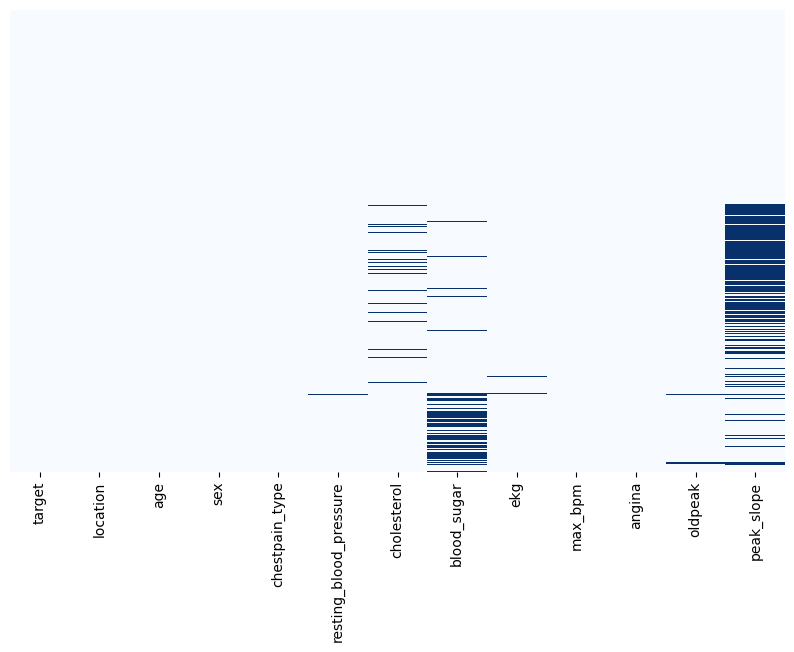

In [ ]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

Antes de meternos la limpieza de datos debemos ver como están distribuidas las categorías de la clase objetivo symboling. Es importante conocer si nuestro conjunto de datos se encuentra balanceado o no.

<Axes: xlabel='target', ylabel='count'>

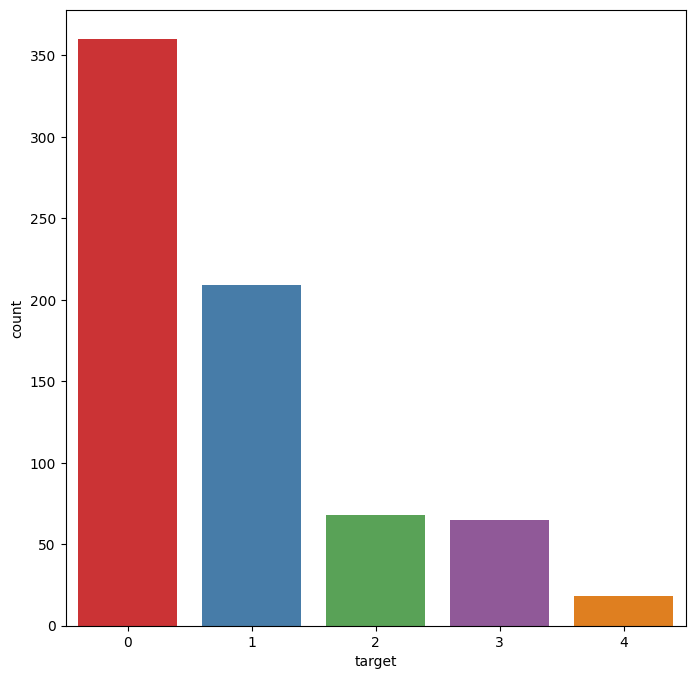

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="target", data=df, palette = "Set1")

In [ ]:
df['target'][df['target'] == 0].count()/df.shape[0]*100

50.0

Partimos de un baseline del 50%

Previo a la inputación de datos, revisamos histogramas de los registros de cada variable, con el fin de visualizar el comportamiento de los datos y qué rango de valores toman, esto nos permitirá también la identificación de variables binarias.

In [ ]:
# Función para graficar histogramas
def histograma_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 40))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:

        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))

    plt.show()

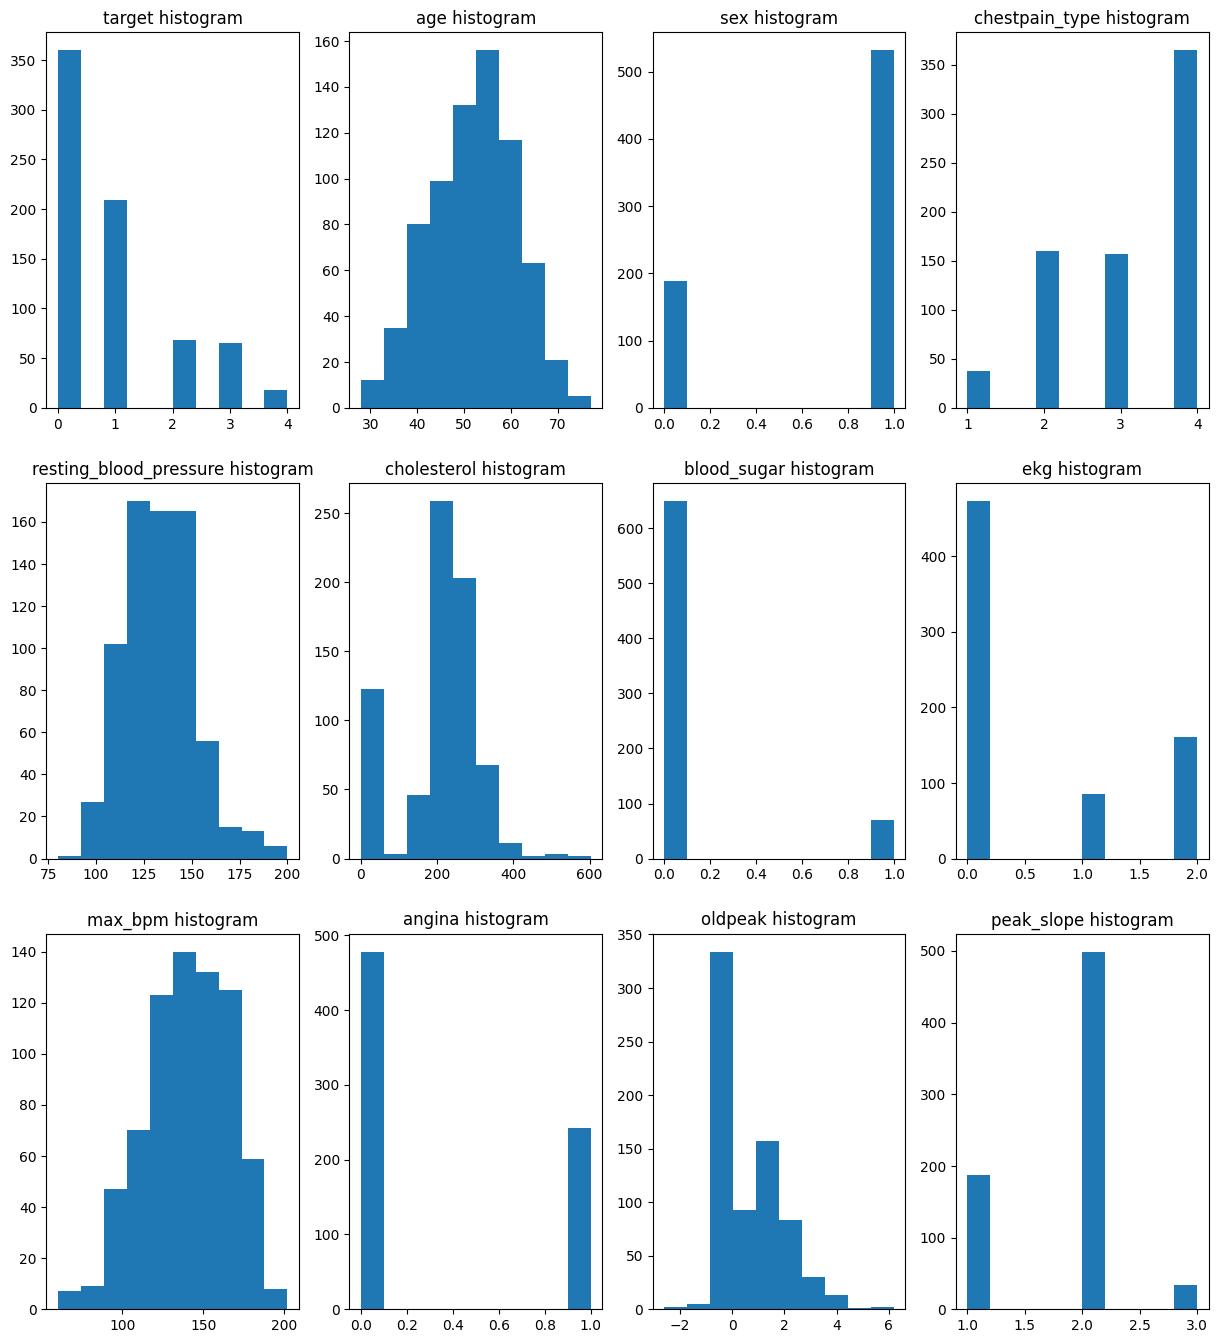

In [ ]:
histograma_visual(df)

Como podemos deducir de la información graficada en los histogramas,y tomando la información del diccionario de datos, se concluye que las siguientes variables son categóricas; <br>

*   blood_sugar: Toma valores "0" y "1"<br>
*   sex: Toma valores  "0" y "1"<br>
*   Chestpain: Toma valores "1", "2", "3" ó "4"<br>
*   angina: Toma valores de "0" ó "1"<br>
*   peak_slope: Toma valores   "1", "2" ó "3" <br>
*   ekg: Toma valores   "0", "1" ó "2" <br>








A continuación, se define un transformador para la imputación de datos, utilizando la media para las columnas numéricas y la moda para las variables categóricas previamente identificadas.

Es importante destacar que esta imputación se realiza con fines académicos. En el contexto de datos médicos, en una aplicación práctica, es crucial contar con la evaluación y el aval de un experto médico para asegurar la validez y precisión de los transformadores utilizados en la imputación.

In [ ]:
# Creamos un Transformer personalizado que nos imputa los valores faltantes
# Utiliza la media para columnas numéricas y la moda para las categóricas
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, cont, cat):
        self.cont = cont
        self.cat = cat

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        for c in self.cont:
            avg = result[c].mean(axis=0)
            result[c].replace(np.nan,avg,inplace=True)
        for c in self.cat:
            mode = result[c].value_counts().idxmax()
            result[c].replace(np.nan,mode,inplace=True)
        return result

In [ ]:
cont = ['resting_blood_pressure', 'cholesterol', 'max_bpm',  'oldpeak']

cat =  ['blood_sugar', 'angina', 'peak_slope', 'ekg']

df = Imputer(cont,cat).fit_transform(df)


In [ ]:
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   target                  720 non-null    int64  
 1   location                720 non-null    object 
 2   age                     720 non-null    float64
 3   sex                     720 non-null    int64  
 4   chestpain_type          720 non-null    int64  
 5   resting_blood_pressure  720 non-null    float64
 6   cholesterol             720 non-null    float64
 7   blood_sugar             720 non-null    float64
 8   ekg                     720 non-null    float64
 9   max_bpm                 720 non-null    float64
 10  angina                  720 non-null    float64
 11  oldpeak                 720 non-null    float64
 12  peak_slope              720 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 73.2+ KB


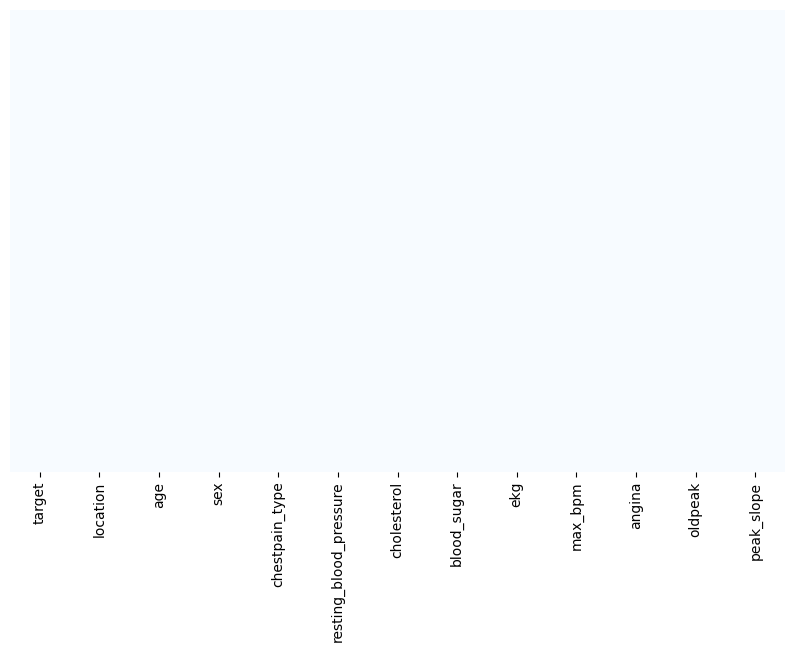

In [ ]:
# Dibujamos un mapa de calor para vislumbrar la ubicación de los valores faltantes

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()

Observamos que ya no contamos con valores faltantes.

#### Valores atípicos
Visualizamos utilizando
- Diagramas de cajas y bigotes
- Histogramas

In [ ]:
# Función para graficar los valores continuos del dataframe
def outliers_visual(data):
    cont_vars = list(data.select_dtypes('number').columns)
    plt.figure(figsize=(15, 40))
    i = 0
    val = int(len(cont_vars)/2) + 1
    for col in cont_vars:
        i += 1
        plt.subplot(val, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(val, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))

    plt.show()

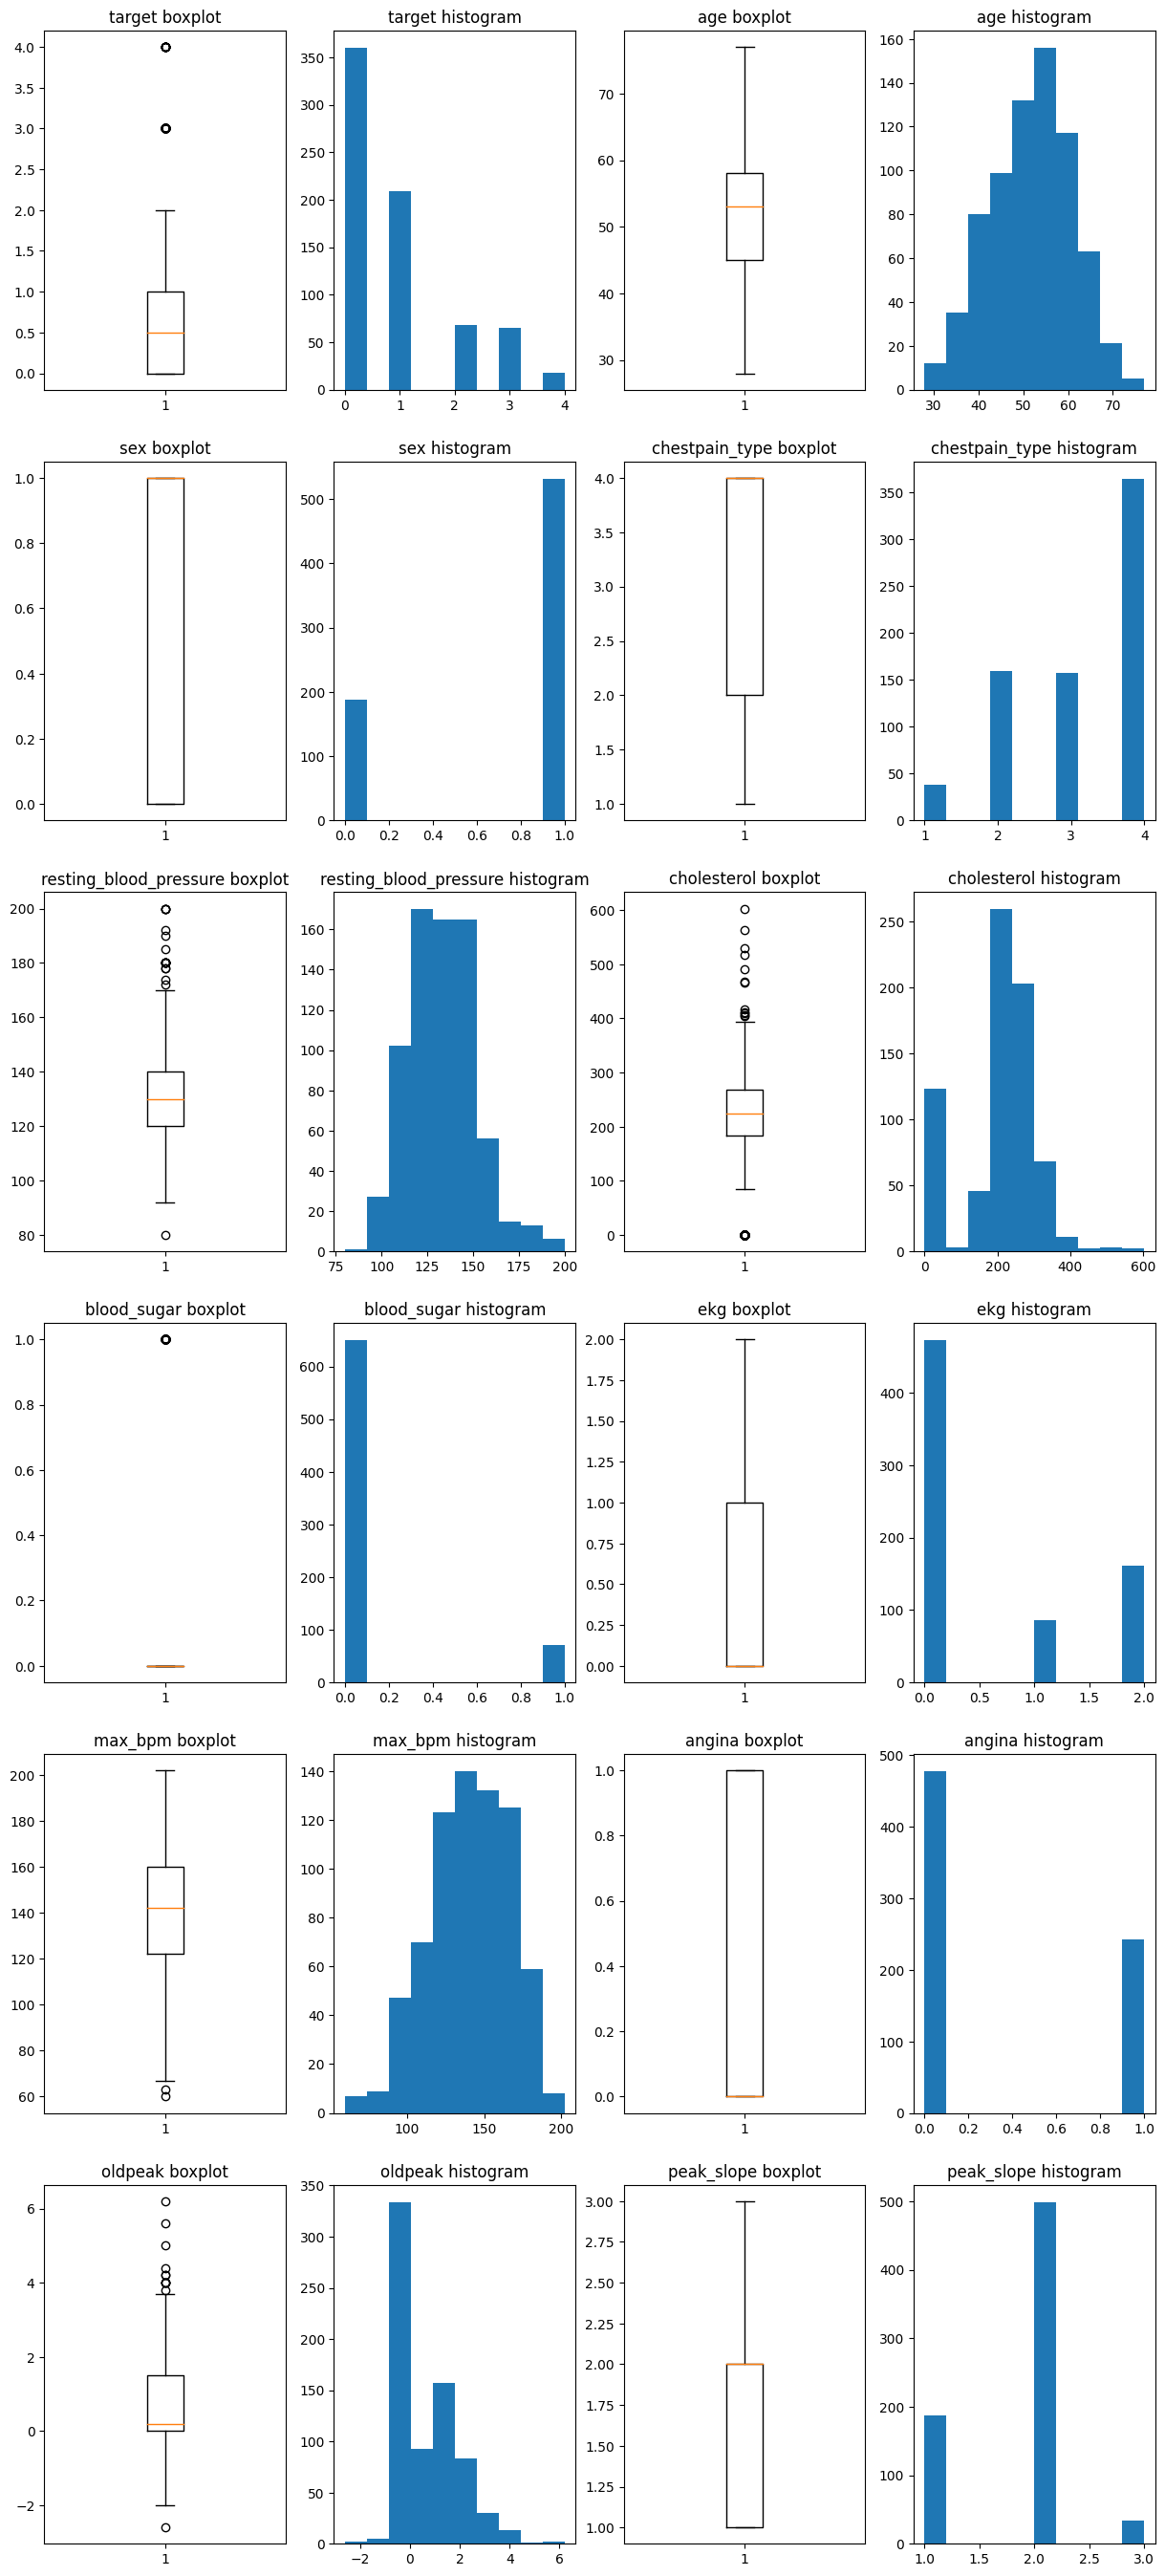

In [ ]:
outliers_visual(df)

Utilizando los gráficos anteriores podemos observar las distribuciones para cada variable continua.

Visualmente resulta claro que existen outliers para algunas de las variables dentro del dataset:



*   resting_blood_pressure
*   cholesterol
*   max_bpm
*   oldpeak

<br>
Podemos corroborar lo anterior de manera estadística haciendo uso del método de Tukey (se consideran como datos atípicos aquellos que están 1.5 veces por fuera del rango intercuartil)

In [ ]:
# Función para calcular los datos atípicos utilizando el método de Tukey
def outlier_count(col, data):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))
    return outlier_count

In [ ]:
# Guardar las columnas de tipo continuas con datos atípicos
cont_vars = []
for col in list(df.select_dtypes('number').columns):
    if outlier_count(col, df) > 0:
        cont_vars.append(col)

---------------target---------------
Number of outliers: 83
Percent of data that is outlier: 11.53%
---------------age---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------sex---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------chestpain_type---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------resting_blood_pressure---------------
Number of outliers: 22
Percent of data that is outlier: 3.06%
---------------cholesterol---------------
Number of outliers: 135
Percent of data that is outlier: 18.75%
---------------blood_sugar---------------
Number of outliers: 70
Percent of data that is outlier: 9.72%
---------------ekg---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------max_bpm---------------
Number of outliers: 2
Percent of data that is outlier: 0.28%
---------------angina---------------
Number of outliers: 0
Percent of data that is outlie

 Limitaremos a través de winsorizing

In [ ]:
from scipy.stats.mstats import winsorize

wins_dict = {}

def test_wins(col, df, wins_dict, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()
    return wins_dict

In [ ]:
df.describe()

,target,age,sex,chestpain_type,resting_blood_pressure,cholesterol,blood_sugar,ekg,max_bpm,angina,oldpeak,peak_slope
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,0.850000,51.888889,0.738889,3.179167,131.804742,204.774749,0.097222,0.566667,140.565460,0.336111,0.789636,1.787500
std,1.076878,9.193720,0.439546,0.953646,18.490635,107.513156,0.296466,0.832911,25.611477,0.472706,1.062500,0.512008
min,0.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000
25%,0.000000,45.000000,0.000000,2.000000,120.000000,184.000000,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000
50%,0.500000,53.000000,1.000000,4.000000,130.000000,225.000000,0.000000,0.000000,142.000000,0.000000,0.200000,2.000000
75%,1.000000,58.000000,1.000000,4.000000,140.000000,269.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000
max,4.000000,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000


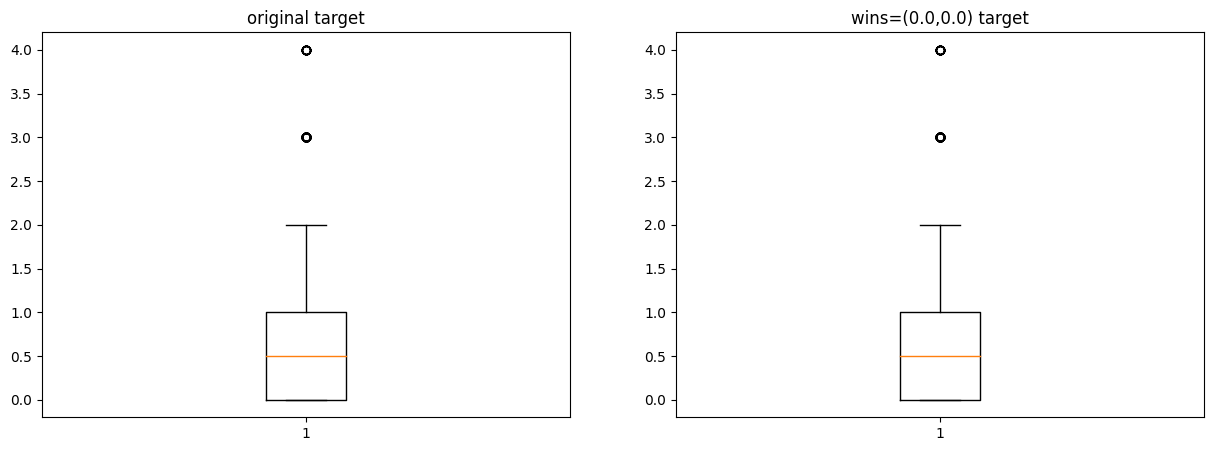

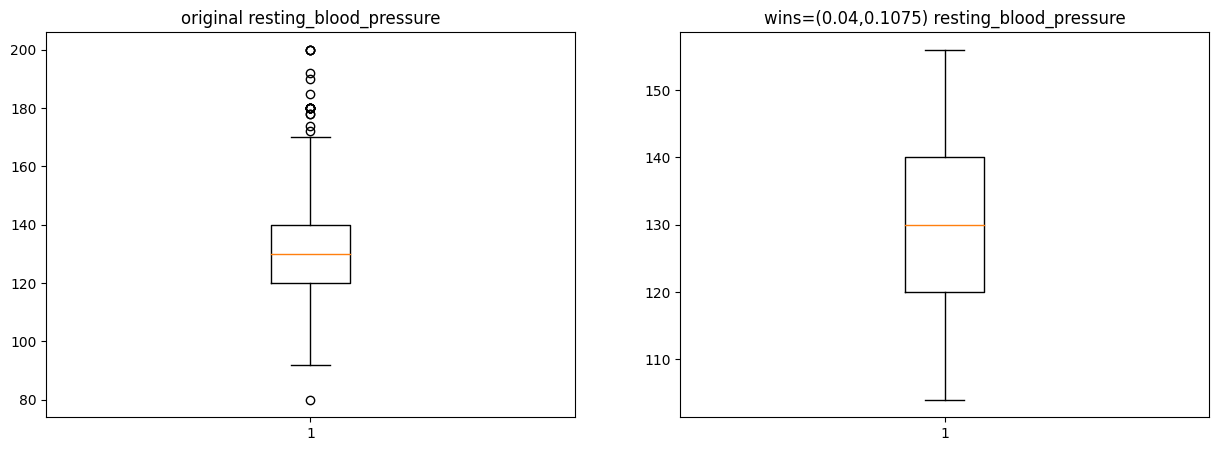

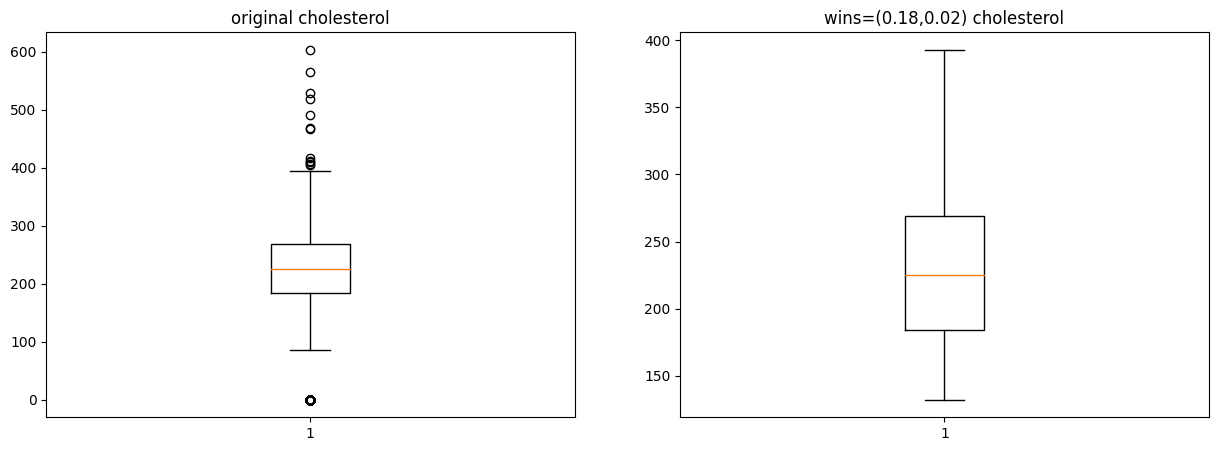

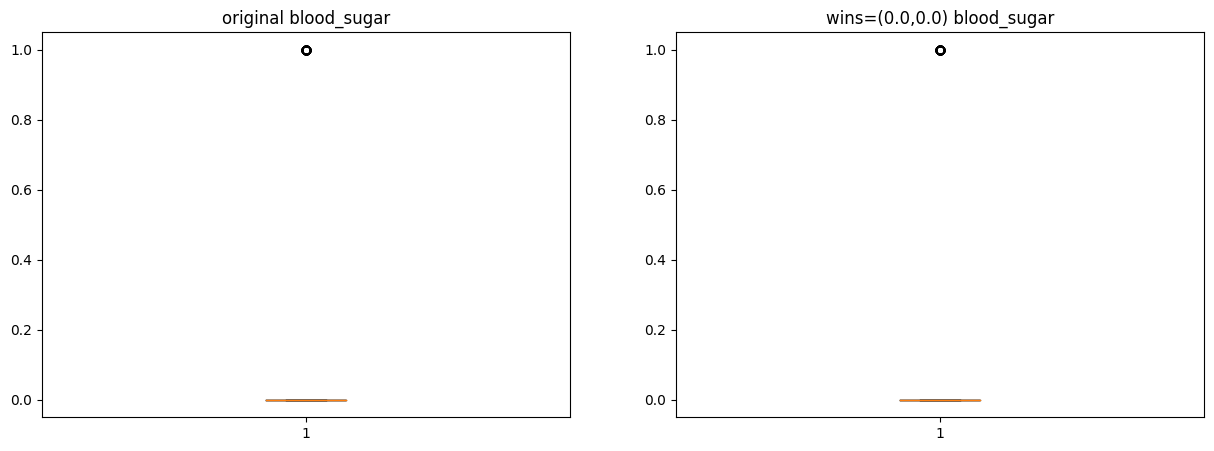

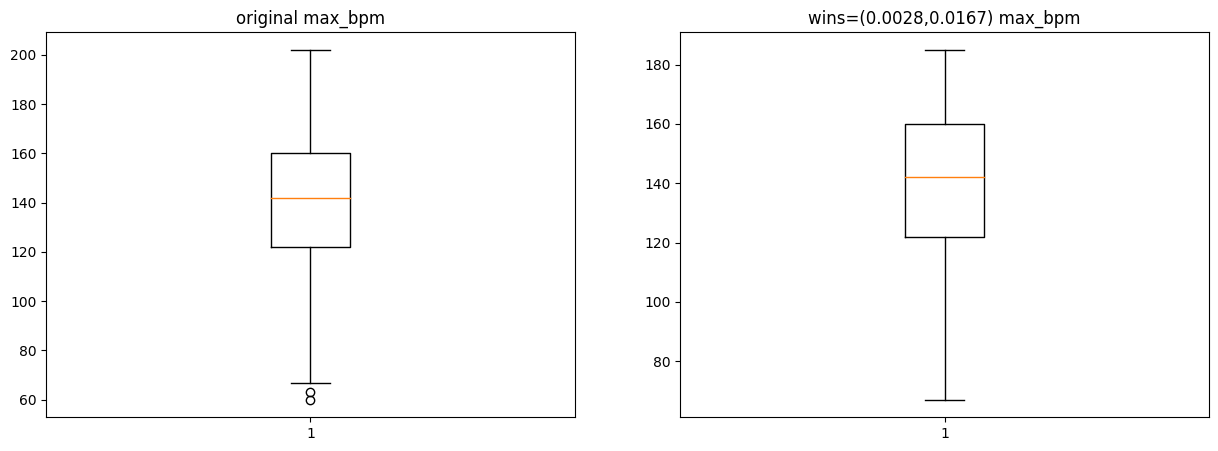

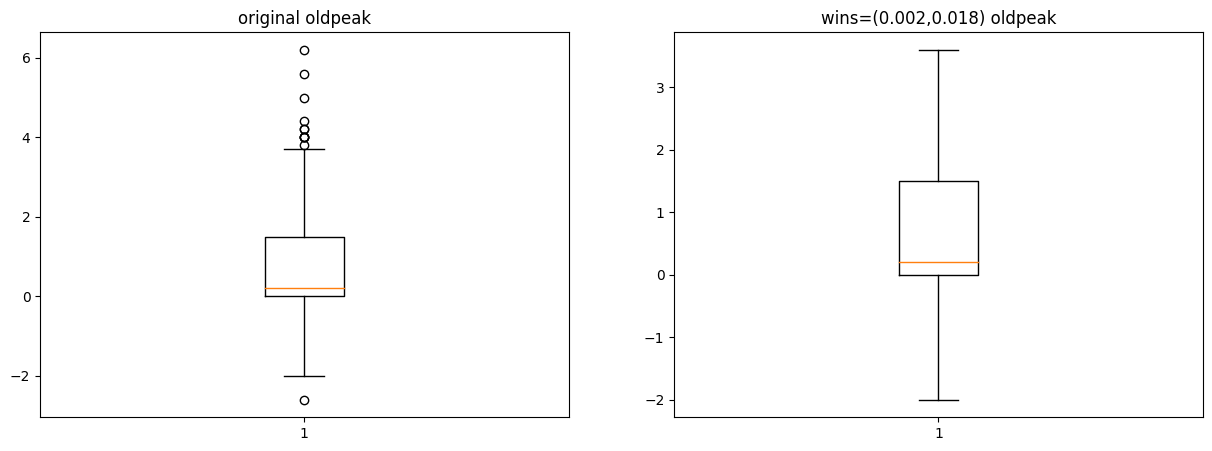

In [ ]:

# Verificación de la Winsorizing
wins_dict = {}

wins_dict = test_wins(cont_vars[0], df, wins_dict, lower_limit=.0, upper_limit=.0, show_plot=True) #target - no se transforma el output al ser la variable objetivo
wins_dict = test_wins(cont_vars[1], df, wins_dict, lower_limit=.04, upper_limit=.1075, show_plot=True) #resting_bloodpressure
wins_dict = test_wins(cont_vars[2], df, wins_dict, lower_limit=0.18, upper_limit=.02, show_plot=True) #cholesterol
wins_dict = test_wins(cont_vars[3], df, wins_dict, lower_limit=.0, upper_limit=.0, show_plot=True) #blood_sugar
wins_dict = test_wins(cont_vars[4], df, wins_dict, lower_limit=.0028, upper_limit=.0167, show_plot=True) #max_bpm
wins_dict = test_wins(cont_vars[5], df, wins_dict, lower_limit=.002, upper_limit=.018, show_plot=True) #oldpeak


In [ ]:
# Creamos un Transformer personalizado para limitar los outliers con el winsorizing
class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, wins, cont_vars):
        self.wins = wins
        self.cont_vars = cont_vars

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        result = X.copy()
        for col in cont_vars:
            result[col] = self.wins[col]
        return result

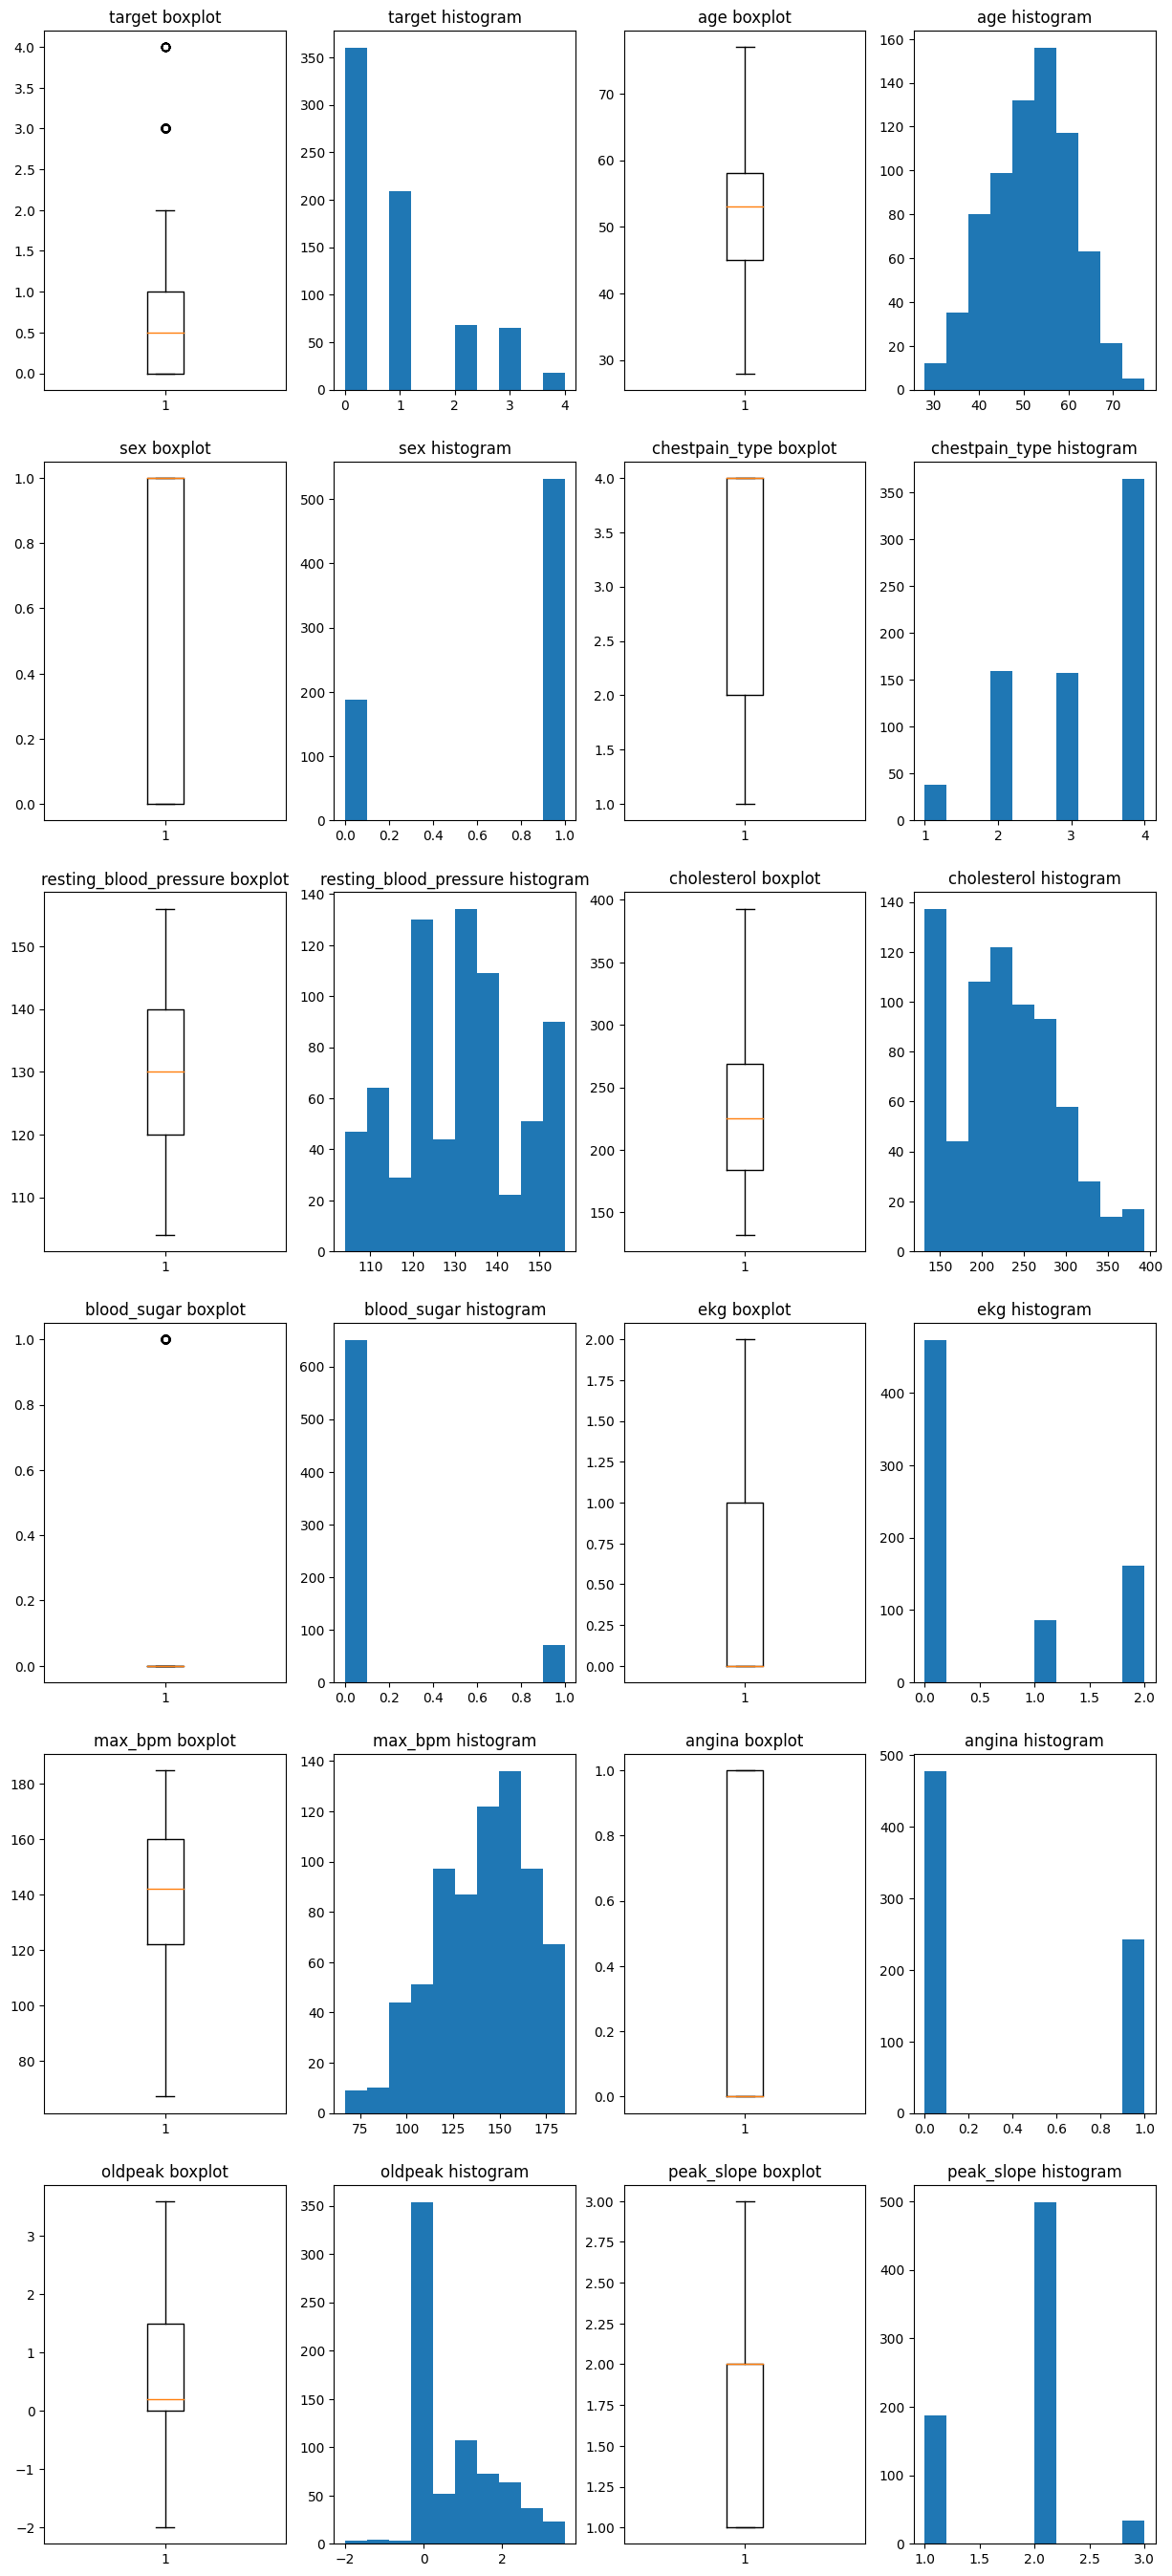

In [ ]:
df_wins = Winsorizer(wins_dict,cont_vars).fit_transform(df)
outliers_visual(df_wins)

### 4.2 Exploración de datos

#### Análisis univariado

In [ ]:
# Descriptores estadísticos para valores categóricos
# Convertir las columnas a tipo 'category'
for column in cat:
    df_wins[column] = df_wins[column].astype('category')

# Seleccionar las columnas categóricas específicas
categorical_df = df_wins[cat]
numeric_df = df_wins[cont]

# Descriptores estadísticos para valores continuos
categorical_df.describe(include='all')

,blood_sugar,angina,peak_slope,ekg
count,720.0,720.0,720.0,720.0
unique,2.0,2.0,3.0,3.0
top,0.0,0.0,2.0,0.0
freq,650.0,478.0,499.0,473.0


In [ ]:
# Descriptores estadísticos para valores continuos
numeric_df.describe()

,resting_blood_pressure,cholesterol,max_bpm,oldpeak
count,720.000000,720.000000,720.000000,720.000000
mean,130.763075,226.116416,140.493237,0.776719
std,15.251646,64.183239,25.396644,1.012742
min,104.000000,132.000000,67.000000,-2.000000
25%,120.000000,184.000000,122.000000,0.000000
50%,130.000000,225.000000,142.000000,0.200000
75%,140.000000,269.000000,160.000000,1.500000
max,156.000000,393.000000,185.000000,3.600000


In [ ]:
# Función para visualizar las distribuciones de las variables continuas
def visualize_distributions(df):
    cols = df.select_dtypes('number').columns
    val = int(len(cols)/2)+1
    plt.figure(figsize=(10, 15))
    for i, col in enumerate(cols, 1):
        plt.subplot(val, 4, i)
        plt.hist(df[col])
        plt.title(col)

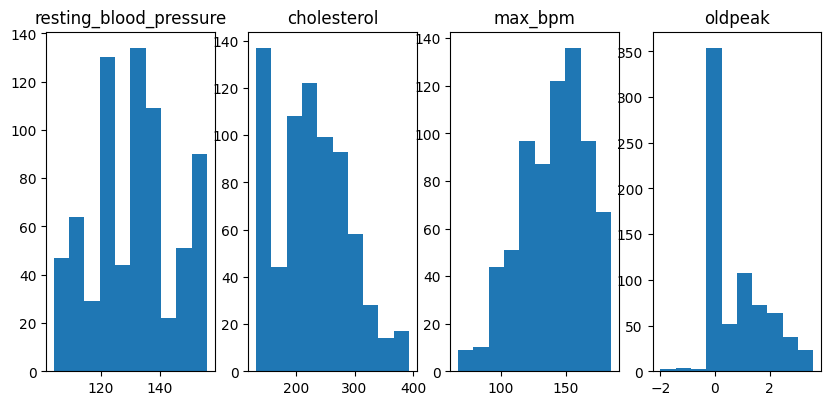

In [ ]:
# Visualizamos la distribución de las variables continuas
visualize_distributions(numeric_df)

Text(0.5, 0, 'blood_sugar')

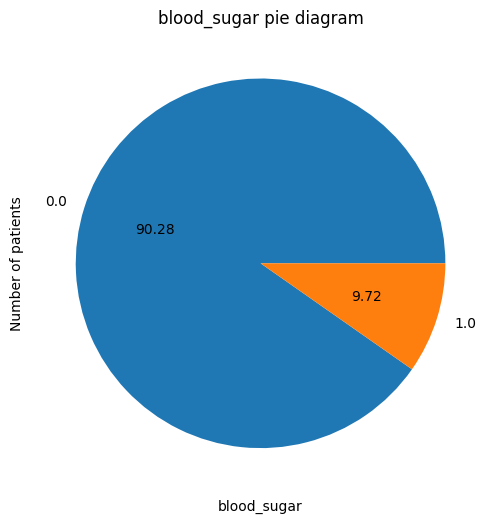

In [ ]:
df_wins['blood_sugar'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("blood_sugar pie diagram")
plt.ylabel('Number of patients')
plt.xlabel('blood_sugar')

Text(0.5, 0, 'sex')

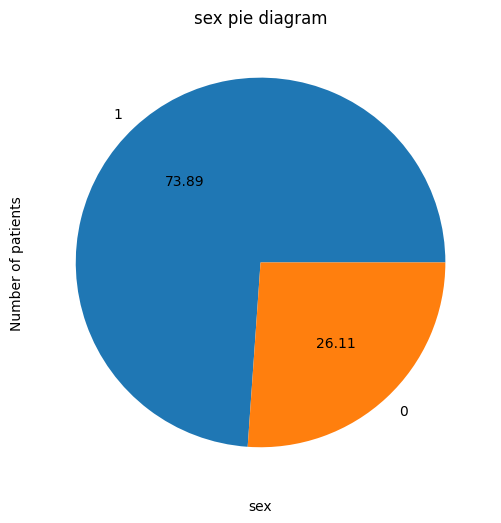

In [ ]:
df_wins['sex'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("sex pie diagram")
plt.ylabel('Number of patients')
plt.xlabel('sex')

Text(0.5, 0, 'angina')

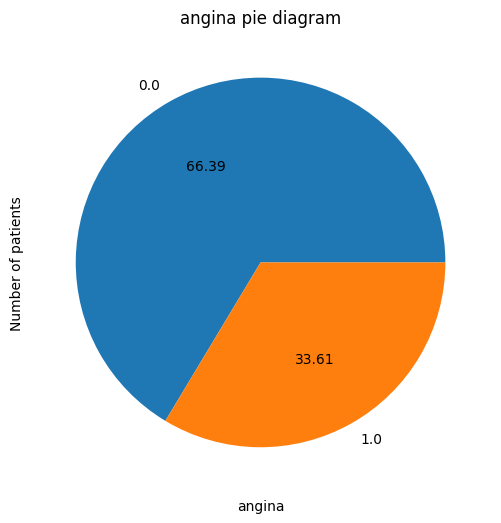

In [ ]:
df_wins['angina'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("angina pie diagram")
plt.ylabel('Number of patients')
plt.xlabel('angina')

Text(0.5, 0, 'peak_slope')

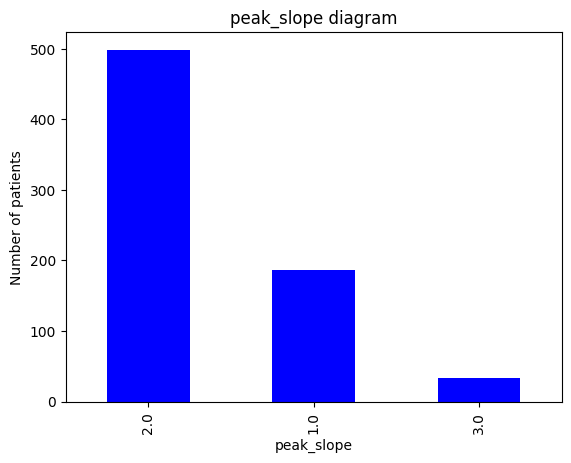

In [ ]:
df_wins['peak_slope'].value_counts().plot(kind='bar',color='blue')
plt.title("peak_slope diagram")
plt.ylabel('Number of patients')
plt.xlabel('peak_slope')


Text(0.5, 0, 'ekg')

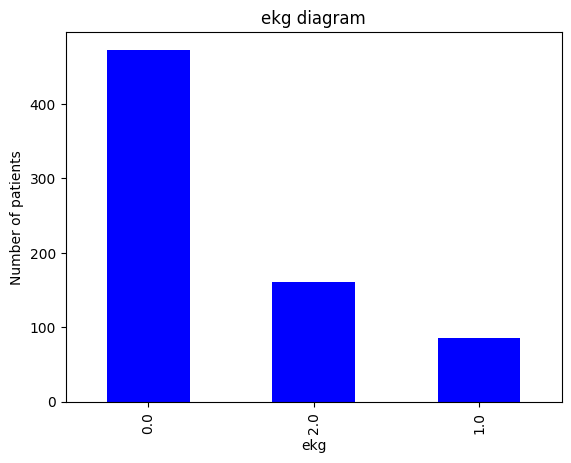

In [ ]:
df_wins['ekg'].value_counts().plot(kind='bar',color='blue')
plt.title("ekg diagram")
plt.ylabel('Number of patients')
plt.xlabel('ekg')

#### Resumen

* Vemos que la mayoría de los pacientes presentar niveles menores a 120mg de azúcar en sangre, así como la mayoría se ubica en el primer nivel según su registro de electrocardiograma (ekg).
* La mayoría de pacientes registrados son masculinos, representando cerca del 74% de los individuos.
* Las variables 'cholesterol' y 'max_bpm' presentan sesgos a la izquierda y a la derecha, respectivamente.





#### Análisis Bivariado

Haciendo uso del diagrama de cajas y bigotes obtendremos un resumen visual de la distribución de cada una de las variables independientes con respecto a la dependiente, observando así la distribución de los distintos grupos.

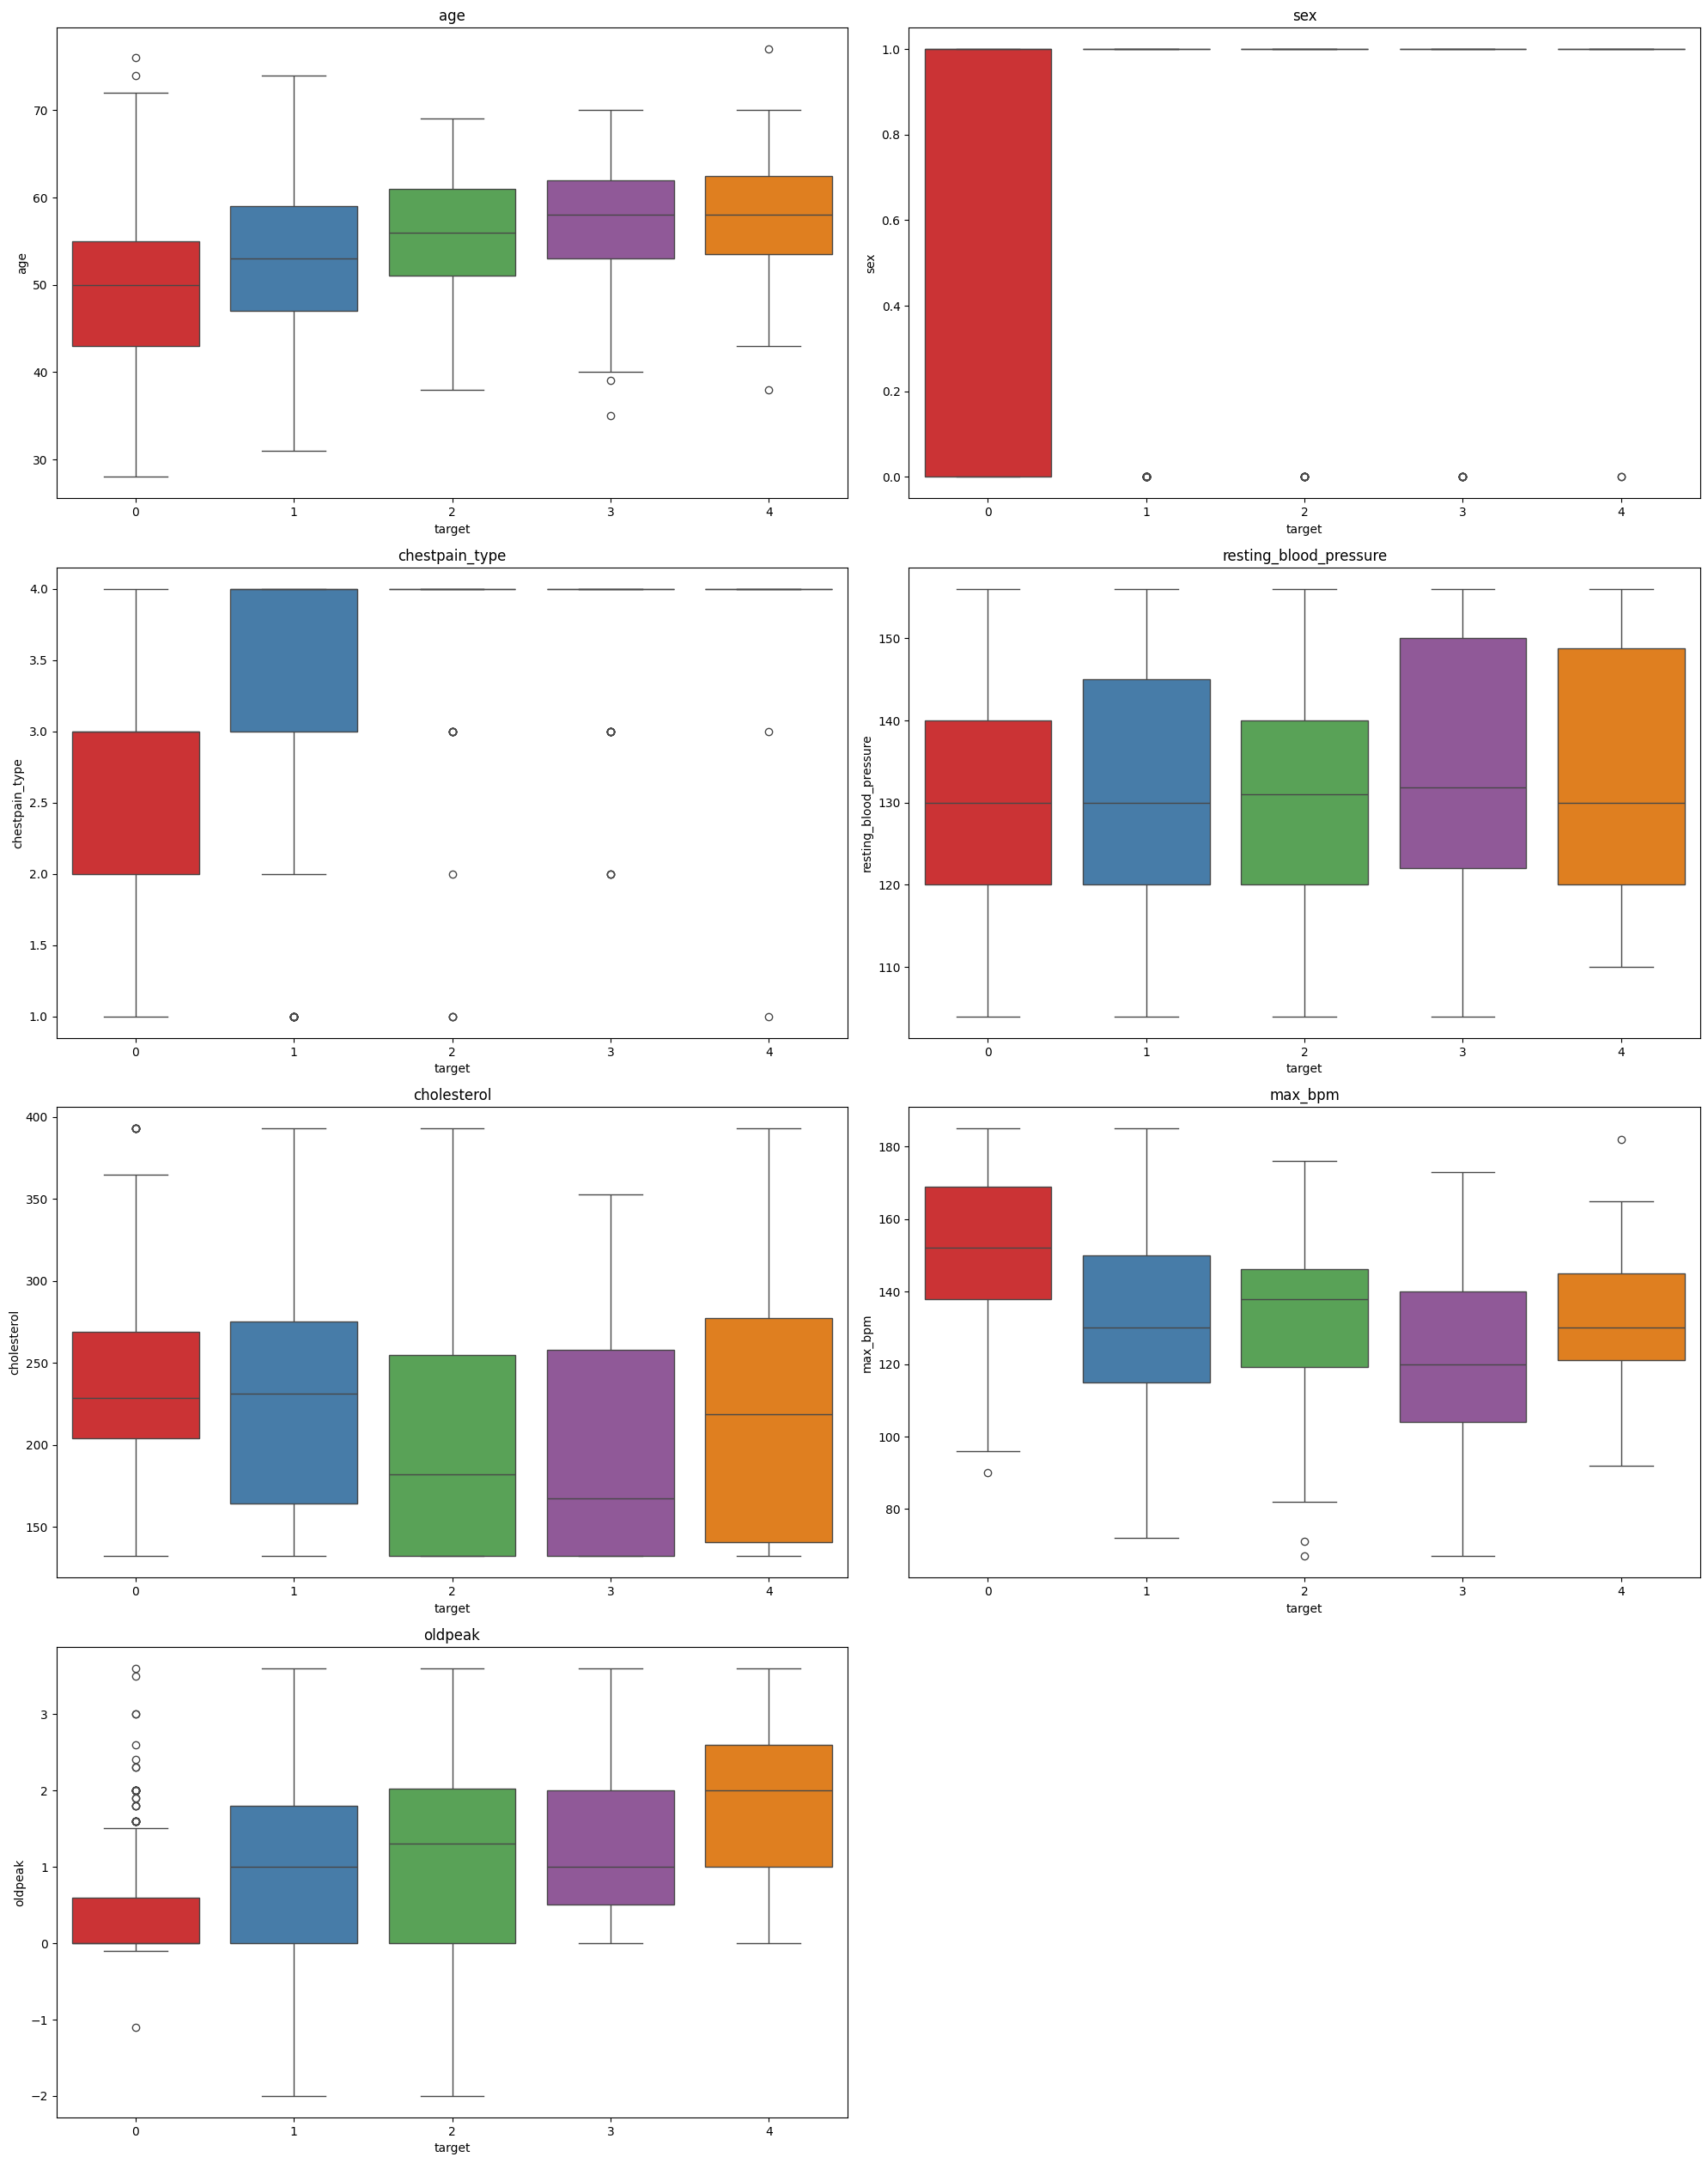

In [129]:
fig = plt.figure(figsize=(20,50))
i=1

for var_num in df_wins.drop(columns='target').select_dtypes(include=['int64','float64']):
    ax = fig.add_subplot(8, 2, i)
    sns.boxplot(x=df_wins.columns[0], y=var_num, data=df_wins, palette='Set1')
    plt.title(var_num)
    i+=1
fig.tight_layout()

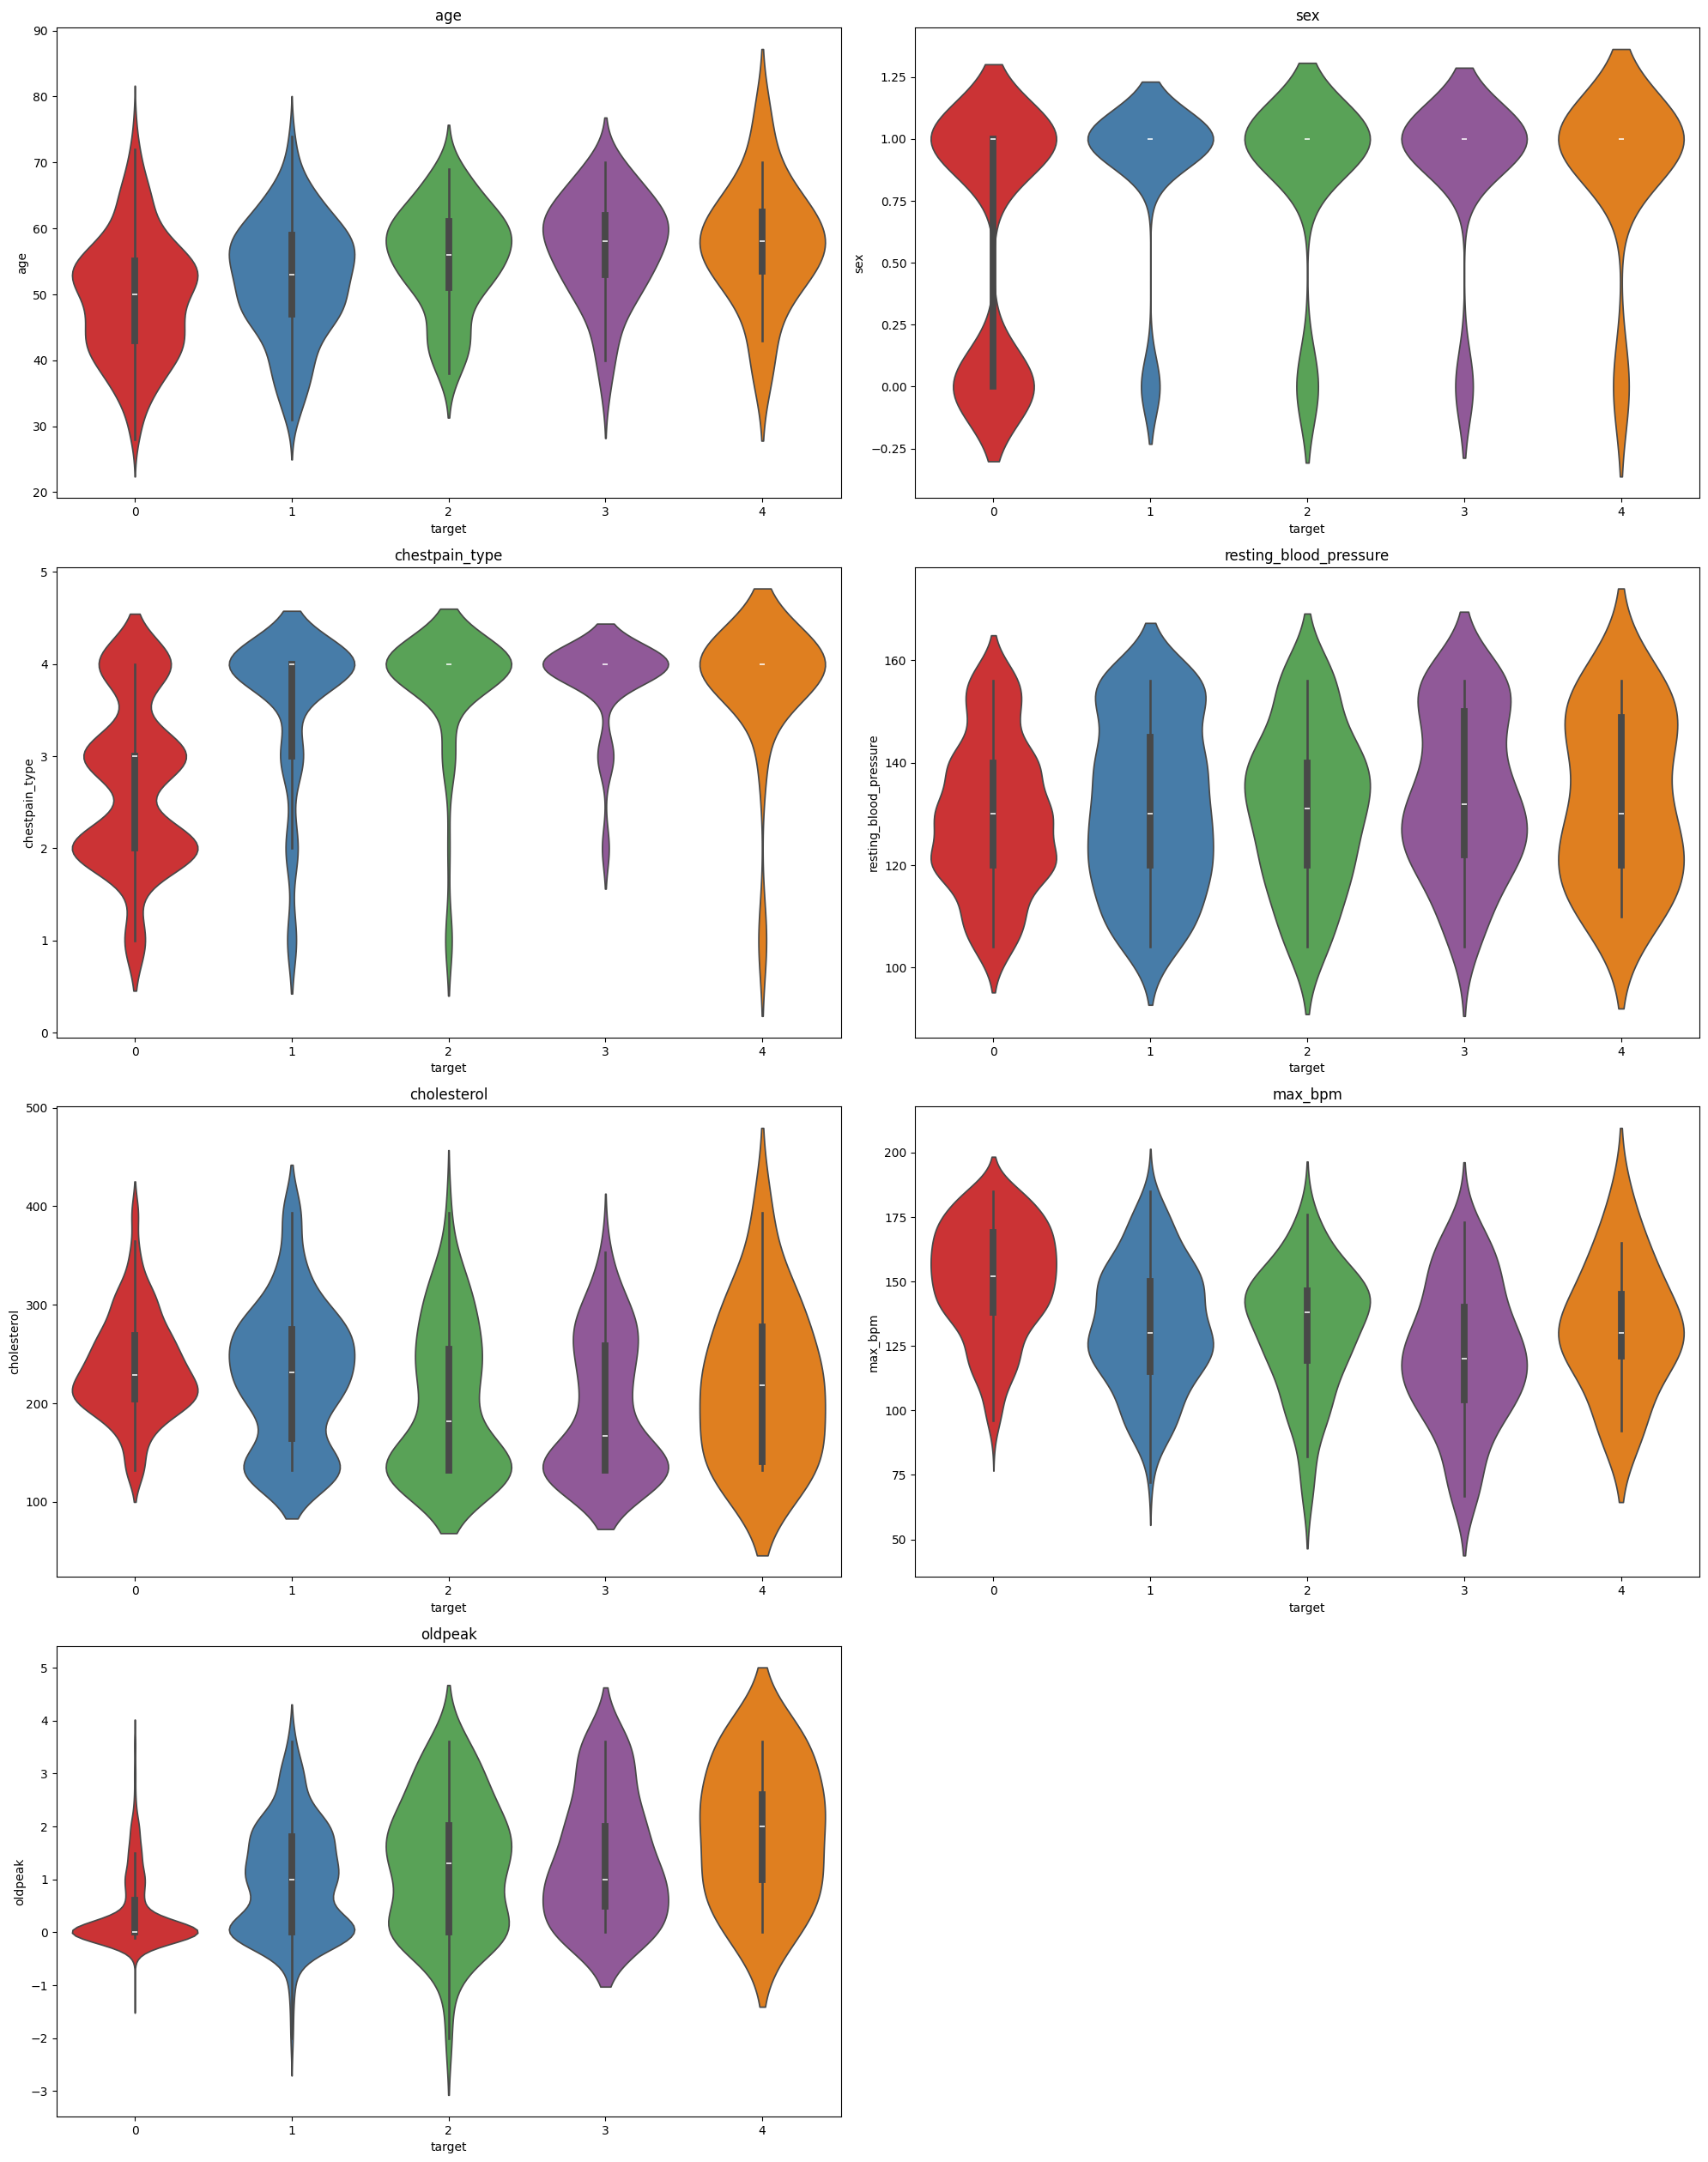

In [130]:
fig = plt.figure(figsize=(20,50))
i=1

for var_num in df_wins.drop(columns='target').select_dtypes(include=['int64','float64']):
    ax = fig.add_subplot(8, 2, i)
    sns.violinplot(x=df_wins.columns[0], y=var_num, data=df_wins, palette='Set1')
    plt.title(var_num)
    i+=1
fig.tight_layout()

Vamos a ubicar los registros de acuerdo a su categoría, de manera que podamos dibujar nuestro diagrama de densidad

In [ ]:
def categories(df):
    target_var = {}
    target_var['Target 0'] = df.loc[df.target == 0]
    target_var['Target 1'] = df.loc[df.target == 1]
    target_var['Target 2'] = df.loc[df.target == 2]
    target_var['Target 3'] = df.loc[df.target == 3]

    return target_var

Con el diagrama de densidad se puede observar aquellas variables independientes que mejor discriminan las clases de la variable objetivo.

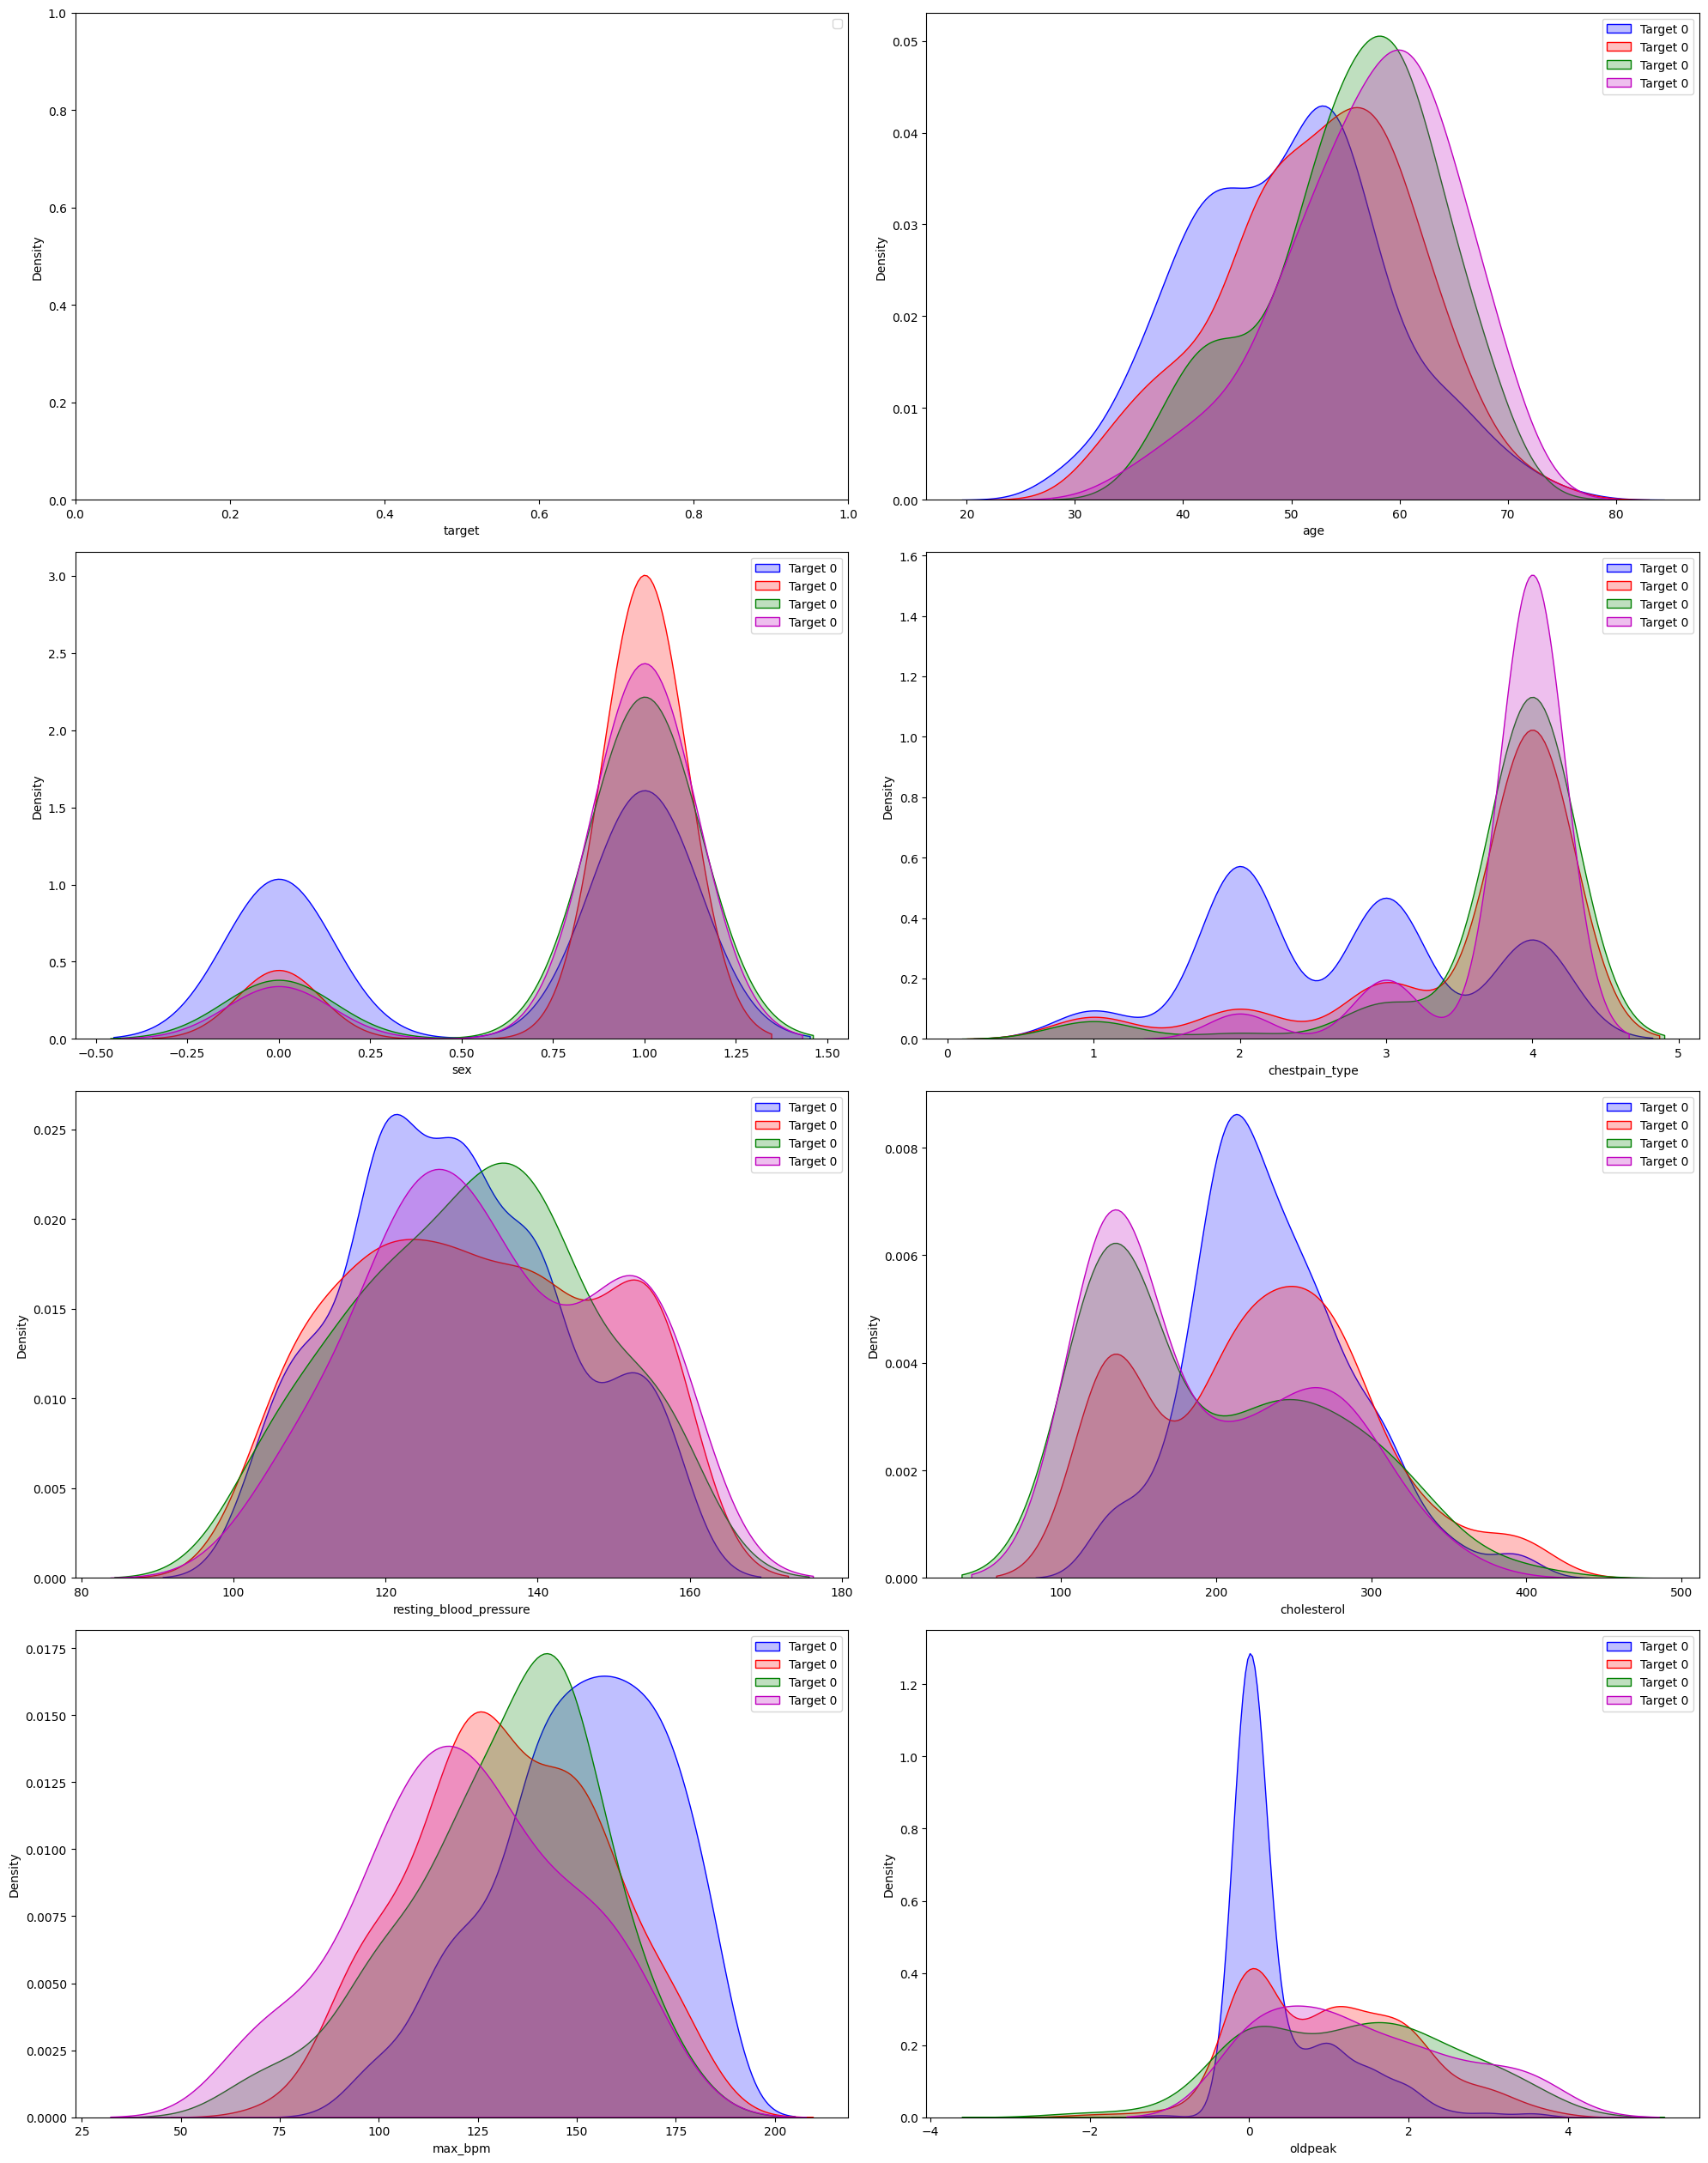

In [ ]:
target_var = categories(df_wins)

i=1
fig = plt.figure(figsize=[20, 50])
for var_num in df_wins.select_dtypes('number').columns:
    ax = fig.add_subplot(8, 2, i)
    sns.kdeplot(target_var['Target 0'][[var_num]].iloc[:,0], shade=True, color="b", label="Target 0",palette='Set1')
    sns.kdeplot(target_var['Target 1'][[var_num]].iloc[:,0], shade=True, color="r", label="Target 1",palette='Set1')
    sns.kdeplot(target_var['Target 2'][[var_num]].iloc[:,0], shade=True, color="g", label="Target 1",palette='Set1')
    sns.kdeplot(target_var['Target 3'][[var_num]].iloc[:,0], shade=True, color="m", label="Target 2",palette='Set1')
    plt.legend()
    i+=1
fig.tight_layout()

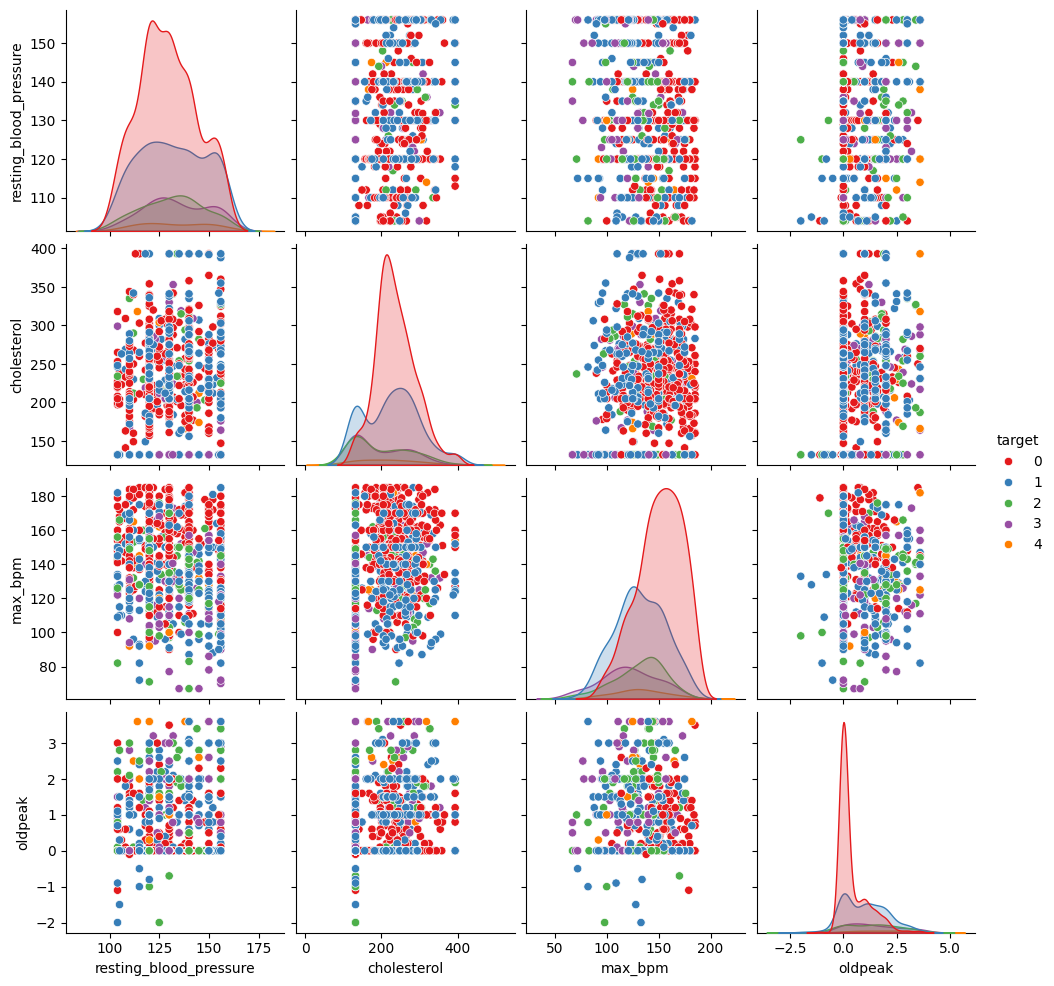

In [ ]:

ax = sns.pairplot(df_wins, vars=['resting_blood_pressure','cholesterol', 'max_bpm',
                                 'oldpeak'], hue="target", palette='Set1')

cont = ['resting_blood_pressure', 'cholesterol', 'max_bpm',  'oldpeak']

In [ ]:
df_wins.select_dtypes(include=['int64','float64']).corr()

,target,age,sex,chestpain_type,resting_blood_pressure,cholesterol,max_bpm,oldpeak
target,1.000000,0.285736,0.237417,0.436561,0.090764,-0.204593,-0.368601,0.401321
age,0.285736,1.000000,-0.026807,0.159796,0.257036,-0.015148,-0.331448,0.225127
sex,0.237417,-0.026807,1.000000,0.154897,0.006982,-0.180415,-0.146998,0.074746
chestpain_type,0.436561,0.159796,0.154897,1.000000,0.005295,-0.090990,-0.339308,0.246456
resting_blood_pressure,0.090764,0.257036,0.006982,0.005295,1.000000,0.099037,-0.112389,0.168883
cholesterol,-0.204593,-0.015148,-0.180415,-0.090990,0.099037,1.000000,0.180759,0.100455
max_bpm,-0.368601,-0.331448,-0.146998,-0.339308,-0.112389,0.180759,1.000000,-0.159889
oldpeak,0.401321,0.225127,0.074746,0.246456,0.168883,0.100455,-0.159889,1.000000


Al construir la matriz de correlaciones vemos que las variables númericas en general no presentan alto nivel de dependencia lineal entre ellas, aún con la variable objetivo.

- Extrañamente, la variable de presión arterial en reposo parece tener muy poca incidencia lineal sobre la variable objetivo.
- Por lo demás, los atributos presentan correlaciones bajas y medias entre ellas, sin una señal clara que nos alerte de multicolinealidad.

Procedemos a graficar estas correlaciones en heatmaps.

In [ ]:
from dython.nominal import identify_nominal_columns, identify_numeric_columns, correlation_ratio
categorical_features=identify_nominal_columns(df_wins)
continuous_features=identify_numeric_columns(df_wins)
categorical_features

['location', 'blood_sugar', 'ekg', 'angina', 'peak_slope']

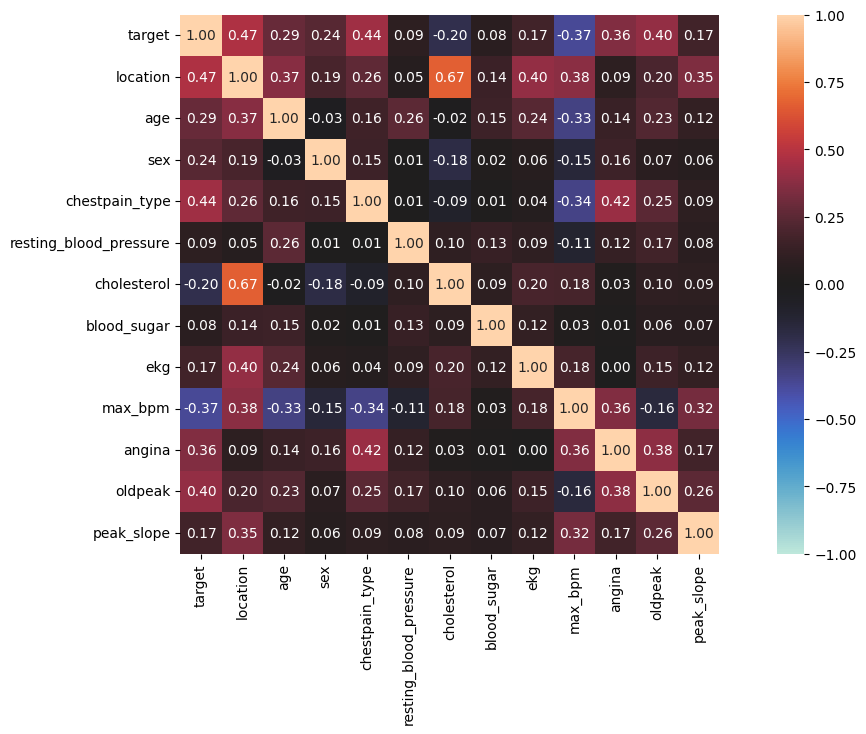

In [ ]:

from dython.nominal import associations
complete_correlation= associations(df_wins, filename= 'complete_correlation.png', figsize=(15,7))


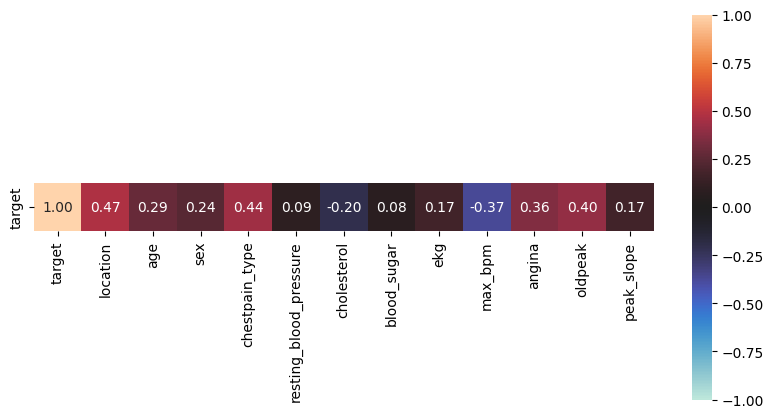

In [ ]:
target_correlation= associations(df_wins, display_rows=['target'], filename= 'target_correlation.png', figsize=(10,5))

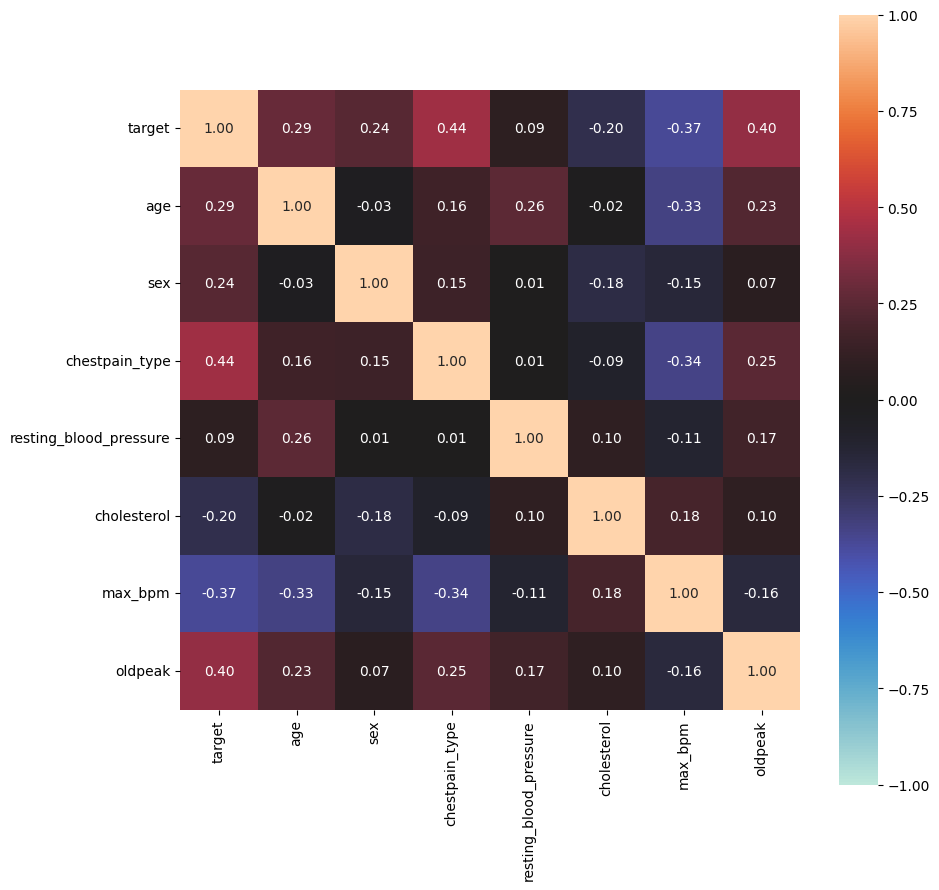

In [ ]:
# Obtenemos la matriz de correlación entre las variables continuas

selected_column= df_wins[continuous_features]
continuous_df = selected_column.copy()

continuous_correlation= associations(continuous_df, filename= 'continuous_correlation.png', figsize=(10,10))

Dado que no existen variables independientes que muestren altas correlaciones entre sí, se descarta la eliminación de nuevas variables, sobre todo porque al ser datos clíncos se busca mantener la mayor cantidad de información posible.

### 4.3 Ingeniería de datos

Procedemos a convertir la variable objetivo en categorica para la corrida de modelos que iniciaremos a continuación.

In [131]:
df_wins['target'] = df_wins['target'].astype('category')

In [143]:
df_wins.set_index('location', drop=True, inplace=True)

In [145]:
# Construimos una función que nos permite obetener el X y el y para el dataframe de carros

def obtain_X_y(df):
    return df.drop(columns=['target']),df[['target']]

## 5. Protocolos de evaluación

Se particiona el dataset en los datos de entrenamiento y prueba, así como se identifica debidamente la variable objetivo y los atributos $ (y, X) $

In [146]:
# Utilizamos el holdout con un 30% para la prueba y 70% para el entrenamiento
from sklearn.model_selection import train_test_split

X = dict()
y = dict()
X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()

# Particionamos los datos para nuestra primer versión
X['rem'], y['rem'] = obtain_X_y(df_wins)

X_train['rem'], X_test['rem'], y_train['rem'], y_test['rem'] = train_test_split(X['rem'],y['rem'],random_state=1234,test_size=0.3)
print(X_train['rem'].shape)
print(X_test['rem'].shape)
print(y_train['rem'].shape)
print(y_test['rem'].shape)

(504, 11)
(216, 11)
(504, 1)
(216, 1)


In [147]:
X

{'rem':             age  sex  chestpain_type  resting_blood_pressure  cholesterol  \
 location                                                                    
 Cleveland  63.0    1               1                   145.0        233.0   
 Cleveland  67.0    1               4                   156.0        286.0   
 Cleveland  67.0    1               4                   120.0        229.0   
 Cleveland  37.0    1               3                   130.0        250.0   
 Cleveland  41.0    0               2                   130.0        204.0   
 ...         ...  ...             ...                     ...          ...   
 Suiza      70.0    1               4                   115.0        132.0   
 Suiza      70.0    1               4                   140.0        132.0   
 Suiza      72.0    1               3                   156.0        132.0   
 Suiza      73.0    0               3                   156.0        132.0   
 Suiza      74.0    1               2                   1

## 6. Métricas de evalución

Implementamos una función que nos permita calcular las métricas de regresión para el conjunto de entrenamiento y de prueba (Accuracy, Kappa, Precision, Recall)

Nos retornará el modelo entrenado y un diccionario con las principales métricas sobre el conjunto de entrenamiento y el de prueba
- Accuracy = (TP + TN) / (TP + FP + FN + TN)
- Kappa = (OA - AC) / (1 - AC)
- Precision = TP / (TP + FP) (valor positivo predicho, la proporción correcta de identificaciones positivas)
- Recall = TP / (TP + FN) (la proporción de positivos que fueron identificados correctamente)

In [165]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, recall_score

def classification_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    kappa_train = cohen_kappa_score(y_train, y_pred_train)
    kappa_test = cohen_kappa_score(y_test, y_pred_test)
    prec_train = precision_score(y_train, y_pred_train,average=None,labels=["0","1","2","3","4"])
    prec_test = precision_score(y_test, y_pred_test,average=None,labels=["0","1","2","3","4"])
    recall_train = recall_score(y_train, y_pred_train,average=None,labels=["0","1","2","3","4"])
    recall_test = recall_score(y_test, y_pred_test,average=None,labels=["0","1","2","3","4"])
    metrics = {"Training Accuracy": acc_train,
               "Test Accuracy": acc_test,
               "Training Kappa": kappa_train,
               "Test Kappa": kappa_test,
               "Training Precision": prec_train,
               "Test Precision": prec_test,
               "Training recall": recall_train,
               "Test recall": recall_test
               }
    for item in metrics.items():
        print(item[0],"=",item[1])
    return model,metrics

def kappa_metrics(model,X_train,X_test,y_train,y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    kappa_train = cohen_kappa_score(y_train, y_pred_train)
    kappa_test = cohen_kappa_score(y_test, y_pred_test)
    return kappa_train, kappa_test

### Modelo base con el dummy classifier

Establecemos la línea base a partir de un dummy classifier que utiliza como estrategia la moda (ya que estamos trabajando con una tarea de clasificación)

In [166]:
from sklearn.dummy import DummyClassifier

classification_metrics(DummyClassifier(strategy='most_frequent'),X_train['rem'],X_test['rem'],y_train['rem'],y_test['rem'])

Training Accuracy = 0.5
Test Accuracy = 0.5
Training Kappa = 0.0
Test Kappa = 0.0
Training Precision = [0.5 0.  0.  0.  0. ]
Test Precision = [0.5 0.  0.  0.  0. ]
Training recall = [1. 0. 0. 0. 0.]
Test recall = [1. 0. 0. 0. 0.]


(DummyClassifier(strategy='most_frequent'),
 {'Training Accuracy': 0.5,
  'Test Accuracy': 0.5,
  'Training Kappa': 0.0,
  'Test Kappa': 0.0,
  'Training Precision': array([0.5, 0. , 0. , 0. , 0. ]),
  'Test Precision': array([0.5, 0. , 0. , 0. , 0. ]),
  'Training recall': array([1., 0., 0., 0., 0.]),
  'Test recall': array([1., 0., 0., 0., 0.])})

Training Accuracy = 0.5
Test Accuracy = 0.5

El modelo de clasificador dummy no parece aportar más información mayor que el azar.

### Reporte de métricas y matriz de confusión

Vamos a definir una función para dibujar la matriz de confusión y el reporte de clasificación en donde podemos obtener las métricas de entrenamiento y prueba

In [167]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusión',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Real')
    plt.xlabel('Predicción')

def report_and_conf_matrix(model,X_train,X_test,y_train,y_test):
    md = model.fit(X_train,y_train)
    y_pred_train = md.predict(X_train)
    y_pred_test = md.predict(X_test)
    cnf_matrix1 = confusion_matrix(y_train, y_pred_train)
    cnf_matrix2 = confusion_matrix(y_test, y_pred_test)
    np.set_printoptions(precision=2)
    plt.figure()
    plot_confusion_matrix(cnf_matrix1, classes=["0","1","2","3","4"],
                      title='Matriz de confusión Entrenamiento')
    print("Reporte Entrenamiento")
    print(classification_report(y_train, y_pred_train, target_names=["0","1","2","3","4"]))
    plt.show()
    plt.figure()
    plot_confusion_matrix(cnf_matrix2, classes=["0","1","2","3","4"],
                      title='Matriz de confusión Prueba')
    print("Reporte Prueba")
    print(classification_report(y_test, y_pred_test, target_names=["0","1","2","3","4"]))
    plt.show()


### Área bajo la curva ROC

Vamos a utilizar el área bajo la curva ROC para evaluar nuestro modelo también. Con esta gráfica vamos a poder visualizar el desempeño del modelo entre la sensibilidad (recall - true positive rate) y la especificidad (true negative rate 1 - FPR), de manera que podamos establecer un balance entre ambos.
- La curva ROC hace un plot entre el TPR y el FPR
- Recall es la habilidad para identificar correctamente las observaciones que son positivas
- Especificidad es la habilidad para indentificar correctamente las observaciones que son negativas
- AUC ROC nos permite identificar que tan bien nuestro modelo puede distinguir entre las clases.

Al tener nosotros un problema multi - clase utilizaremos una metodología uno vs el resto. Se tendrán tantas curvas como clases. Yellowbrick es muy útil y simple para esto

- Utilizando las curvas individuales podemos ver que tan bien nuestro modelo trabaja para cada una de las categorías

- La curva micro-average ROC agrega todas las instancias sobre todas las clases y nos brinda una sola curva para todas las predicciones (afectada por la moda).

- La curva macro-average ROC trata clase de manera independiente y nos presenta una curva ROC que es el promedio de los valores para cada clase (cada clase tiene la misma importancia).

In [168]:
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, X_train, y_train, X_test, y_test):
    visualizer = ROCAUC(model, encoder={'0': 'neutral',
                                        '1': 'riesgo menor',
                                        '2': 'riesgo leve',
                                        '3': 'riesgo moderado',
                                        '4': 'riesgo mayor'})
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    return visualizer

Podemos observar el funcionamiento de la curva ROC y el área bajo ella utilizando uno de los modelos más sencillos para abordar tareas de clasificación, la regresión logística.

In [162]:
df_wins['target'].unique()

[0, 2, 1, 3, 4]
Categories (5, int64): [0, 1, 2, 3, 4]

In [170]:
plot_ROC_curve(LogisticRegression(random_state=1234), X_train=X_train['rem'], y_train=y_train['rem'], X_test=X_test['rem'], y_test=y_test['rem'])
# Ensure score raises error (macro curves aren't defined for binary decisions)


ModelError: cannot decode class 0 to label, key not specified by encoder

In [ ]:
pip install dython